<h3><left>Dílan Vera Cruz</h3>
<h1><center>Project "AirBnB Predictions"</center></h1>
<img src="https://link.estadao.com.br/blogs/lol/wp-content/uploads/sites/367/2014/07/airbnb-logo-real.jpg" width="200" align="center">

<h1> Problem Definition <br>  

<h3><left>Dataset-Description: </left></h3>
It was selected a publicly accessible dataset from kaggle.com - the Dataset contains 74111 entries with 29 columns and can be reviewed through the following link: https://www.kaggle.com/stevezhenghp/airbnb-price-prediction#train.csv

The goal of this project is to predict the price of an Airbnb rental, evaluating the features of a given accommodation. Taking specific attributes into consideration (such as bedrooms, bathrooms, amenities and type of the property) with the goal to predict the value of the dependent variable (price).

**Movivation** <br>
Airbnb is a booking engine that allows users to rent vacation homes. The platform can be used privately or in a commercial setting. It is currently one of the most revolutionary services in the real estate industry and counts approximately 5.6 million active listings in 220 countries. Counting over 150 users, it is a service that has grown tremendously throughout the years. Considering the popularity of the service and the fact that it can be used either commercially or by private individuals, it is important to gain insight about property-pricing, given the characteristics of an accommodation. This knowledge is valuable to both the host who wants to put his place to rent and maximize profits, as well as to the guest who wants to rent it for a reasonable amount of money.

**The objectives are:**
- provide a visualization of the regions where the accommodations were rented
- find the features of homes that have the highest impact on the final price

The goal is to examine what kind of places were rented the most and why, and predict the real rental price based on the features of the place.
The findings will benefit both landlords and guests, by providing insight into pricing strategies and helping to examine and evaluate the provided value for money.

**Importing libraries**<br>
As the first step it will be imported the necessary libraries:

In [ ]:
#importing libraries
import pandas as pd # For Data Frame
import numpy as np # For operation on data

In [ ]:
from matplotlib import pyplot as plt # for Visualization of Graphs.
import seaborn as sns # Visualization of Graphs

In [ ]:
import folium # for Visaulization of Latitude and Logitude on Map

**Importing dataset** <br>
As the second step it will be imported the data from the CSV-format it was provided and displayed the first 5 rows of the dataset, to check if it was successfully imported.

In [ ]:
#importing dataset
df = pd.read_csv("Airbnb_dataset.csv")
df.head()

id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee  ...   latitude   longitude  \
0  Real Bed              strict          True  ...  40.696524  -73.991617   
1  Real Bed              strict          True  ...  40.766115  -73.989040   
2  Real Bed            moderate          True  ...  40.808110  -73.943756   
3  Real Bed            flexible          True  ...  37.772004 -122.431619   
4  Real Bed            moderate          True  ...  38.925627  -77.034596   

                                       name     neighbourhood  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2                          The Garden Oasis            Harlem   
3        Beautiful Flat in the Heart of SF!      Lower Haight   
4                Great studio in midtown DC  Columbia Heights   

  number_of_reviews review_scores_rating  \
0                 2                100.0   
1                 6                 93.0   
2                10                 92.0   
3                 0                  NaN   
4                 4                 40.0   

                                       thumbnail_url  zipcode bedrooms  beds  
0  https://a0.muscache.com/im/pictures/6d7cbbf7-c...    11201      1.0   1.0  
1  https://a0.muscache.com/im/pictures/348a55fe-4...    10019      3.0   3.0  
2  https://a0.muscache.com/im/pictures/6fae5362-9...    10027      1.0   3.0  
3  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0      2.0   2.0  
4                                                NaN    20009      0.0   1.0  

[5 rows x 29 columns]

<h3><left> Exploratory Data Analysis and Feature Engineering

**Exploring the dataset**

The display of the head of the dataset shows that the import has been succesful.
<br> It can also be seen some characteristics of the dataset.
The dataset consists of 29 colums with the datatypes int, float, object and boolean.
There are column with different datatypes:
- 3 columns are from the datatype int;
- 7 columns are float;
- 18 are object and one is from the datatype boolean.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

As it can be seen, the dataset has 74111 rows and 29 columns:

In [ ]:
df.shape

(74111, 29)

Next the columns of the dataset will be explored:

In [ ]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [ ]:
df.describe()

id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.397525          20.900568             94.067365      1.265793   
std       21.705322          37.828641              7.836556      0.852143   
min     -122.511500           0.000000             20.000000      0.000000   
25%     -118.342374           1.000000             92.000000      1.000000   
50%      -76.996965           6.000000             96.000000      1.000000   
75%      -73.954660          23.000000            100.000000      1.000000   
max      -70.985047         605.000000            100.000000     10.000000   

               beds  
count  73980.000000  
mean       1.710868  
std        1.254142  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       18.000000

The data has both integer or float datatype and therefore can be used for some statistical calculations in the dataset.

In the output above there are some values of the discrete variables that don't make much sense. For example in the min row the log_price and number of beds are equal to 0. Since the main purpose of renting an Airbnb is to get a place to sleep, and in return be charged for it, having an accommodation for free or an accommodation without beds, does not make a lot of sense. Let's explore this issue further below.<br><br>
**Column beds:**<br>
To verify, that no information is being missed (maybe the bed in the accommodation is not a real bed, but a sofa or else), Let's look at the specific accommodations, where the number of beds is 0.

In [ ]:
df[df.beds == 0]

id  log_price property_type        room_type  \
13672   7922378   5.129899     Apartment  Entire home/apt   
24062  20269147   5.783825         House  Entire home/apt   
39057   8684344   4.691348     Apartment  Entire home/apt   
55285  15419976   5.991465         House  Entire home/apt   

                                               amenities  accommodates  \
13672  {TV,Internet,"Wireless Internet",Kitchen,Washe...             2   
24062  {TV,Internet,"Wireless Internet","Air conditio...             2   
39057  {TV,"Cable TV",Internet,"Wireless Internet","A...             2   
55285  {TV,Internet,"Wireless Internet","Air conditio...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   latitude  \
13672        1.0  Real Bed              strict          True  ...  37.799400   
24062        1.0  Real Bed     super_strict_30         False  ...  40.753483   
39057        1.0  Real Bed              strict          True  ...  42.348882   
55285        1.0  Real Bed     super_strict_30         False  ...  40.752909   

        longitude                                     name neighbourhood  \
13672 -122.426718         COZY PRIVATE Bedroom in 2Br Apt!    Cow Hollow   
24062  -73.973383  Stay at Midtown 45 in the heart of NYC!  Midtown East   
39057  -71.081258                  Posh Studio in Back Bay      Back Bay   
55285  -73.972833     Visit the Big Apple with Midtown 45!  Midtown East   

      number_of_reviews review_scores_rating  \
13672                 0                  NaN   
24062                 0                  NaN   
39057                53                 94.0   
55285                 0                  NaN   

                                           thumbnail_url zipcode bedrooms  \
13672  https://a0.muscache.com/im/pictures/48546368/e...   94123      1.0   
24062  https://a0.muscache.com/im/pictures/9c51b39d-2...   10017      0.0   
39057  https://a0.muscache.com/im/pictures/ab9d2f1d-e...   02116      0.0   
55285  https://a0.muscache.com/im/pictures/464cf3aa-4...   10017      1.0   

       beds  
13672   0.0  
24062   0.0  
39057   0.0  
55285   0.0  

[4 rows x 29 columns]

The dataset has 4 properties, where the beds show 0, however when looking at the bed_type it is indicated that the beds are real beds.
By using the thumbnail_url from the dataset, a quick research can be done on the internet and assess the accommodations and their features.
- *Row 13672* - a bed can be seen in the picture: https://a0.muscache.com/im/pictures/48546368/ebada46a_original.jpg
- *Row 24062* - a bed can be seen in the picture: https://www.hrs.com/en/hotel/wyndham-midtown-45/a-215985/
- *Row 39057* - a bed can be seen in the picture: https://a0.muscache.com/im/pictures/ab9d2f1d-e95c-4dd1-843c-85da28b3b4af.jpg
- *Row 55285* - there are no pictures of the property available: https://a0.muscache.com/im/pictures/464cf3aa-4226-4953-83b4-35a956e5bd46.jpg?aki_policy=small <br>
The images show that they indeed have beds.<br>
Considering this inconsistency, these 4 rows will be dropped from the dataset:

In [ ]:
df.drop(df[df.beds == 0].index, inplace = True)

Let's check again, if there are still rows with 0 beds and if the rows have successfully been dropped:

In [ ]:
df[df.beds == 0]

Empty DataFrame
Columns: [id, log_price, property_type, room_type, amenities, accommodates, bathrooms, bed_type, cancellation_policy, cleaning_fee, city, description, first_review, host_has_profile_pic, host_identity_verified, host_response_rate, host_since, instant_bookable, last_review, latitude, longitude, name, neighbourhood, number_of_reviews, review_scores_rating, thumbnail_url, zipcode, bedrooms, beds]
Index: []

[0 rows x 29 columns]

**Column price**<br>
A similar approach will be taken with the price column, searching for properties, where the price is set to 0 and will find 1 property that meets this characteristic:

In [ ]:
df[df.log_price == 0]

id  log_price property_type    room_type  \
11632  17972519        0.0   Condominium  Shared room   

                                               amenities  accommodates  \
11632  {TV,"Wireless Internet","Air conditioning",Kit...             1   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   latitude  \
11632        1.0  Real Bed              strict          True  ...  40.838054   

       longitude            name neighbourhood number_of_reviews  \
11632 -73.858665  Esteem's Place   Parkchester                 3   

      review_scores_rating                                      thumbnail_url  \
11632                 87.0  https://a0.muscache.com/im/pictures/71bc085f-b...   

      zipcode bedrooms  beds  
11632   10462      1.0   1.0  

[1 rows x 29 columns]

By using the thumbnail_url to make a quick search on the internet, the actual property could be found: <br>
- *Thumbnail:* https://a0.muscache.com/im/pictures/71bc085f-b869-4cda-8b4f-dca694ebbd26.jpg
- *Property:* https://www.airbnb.pt/rooms/19974905?check_in=2023-01-29&check_out=2023-02-05&adults=1&children=0&infants=0&_set_bev_on_new_domain=1657832804_NTI1ZWY3MWIxYjEy&source_impression_id=p3_1667302494_RVCFawwriFfIOR2m

It can be seen in the link that the price varies with the date but it is never actually $0, so it seems that the data was not well gathered for that specific line. So it will be dropped it from the dataset.

In [ ]:
df.drop(df[df.log_price == 0].index, inplace = True)

In [ ]:
df[df.log_price == 0]

Empty DataFrame
Columns: [id, log_price, property_type, room_type, amenities, accommodates, bathrooms, bed_type, cancellation_policy, cleaning_fee, city, description, first_review, host_has_profile_pic, host_identity_verified, host_response_rate, host_since, instant_bookable, last_review, latitude, longitude, name, neighbourhood, number_of_reviews, review_scores_rating, thumbnail_url, zipcode, bedrooms, beds]
Index: []

[0 rows x 29 columns]

In [ ]:
df.describe()

id     log_price  accommodates     bathrooms      latitude  \
count  7.410600e+04  74106.000000  74106.000000  73906.000000  74106.000000   
mean   1.126643e+07      4.782100      3.155210      1.235279     38.445820   
std    6.081761e+06      0.717178      2.153632      0.582061      3.080200   
min    3.440000e+02      1.609438      1.000000      0.000000     33.338905   
25%    6.261907e+06      4.317488      2.000000      1.000000     34.127901   
50%    1.225413e+07      4.709530      2.000000      1.000000     40.662123   
75%    1.640216e+07      5.220356      4.000000      1.000000     40.746086   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74106.000000       74106.000000          57387.000000  74015.000000   
mean     -92.398155          20.901223             94.067489      1.265838   
std       21.705315          37.829443              7.836637      0.852145   
min     -122.511500           0.000000             20.000000      0.000000   
25%     -118.342380           1.000000             92.000000      1.000000   
50%      -76.996979           6.000000             96.000000      1.000000   
75%      -73.954661          23.000000            100.000000      1.000000   
max      -70.985047         605.000000            100.000000     10.000000   

               beds  
count  73975.000000  
mean       1.710970  
std        1.254118  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       18.000000

In [ ]:
df.shape

(74106, 29)

**Removing columns:** <br>
Some other columns in the dataset are unnecessary for the goal of this project, therefore they will be dropped. Those columns are:
- description;
- first_review;
- host_has_profile_pic;
- last_review;
- thumbnail_url;
- zipcode;
- id. <br>
Having dropped 7 columns, 23 colums are left.

In [ ]:
df.drop(columns = ['id', 'description', 'first_review', 'last_review', 'thumbnail_url', 'zipcode'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74106 entries, 0 to 74110
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74106 non-null  float64
 1   property_type           74106 non-null  object 
 2   room_type               74106 non-null  object 
 3   amenities               74106 non-null  object 
 4   accommodates            74106 non-null  int64  
 5   bathrooms               73906 non-null  float64
 6   bed_type                74106 non-null  object 
 7   cancellation_policy     74106 non-null  object 
 8   cleaning_fee            74106 non-null  bool   
 9   city                    74106 non-null  object 
 10  host_has_profile_pic    73918 non-null  object 
 11  host_identity_verified  73918 non-null  object 
 12  host_response_rate      55808 non-null  object 
 13  host_since              73918 non-null  object 
 14  instant_bookable        74106 non-null

<h3> Amenities </h3>
Now, let's have a look at the amenities column, as it consists of a set of objects that will not be useful for the performance of the algorithm.
Therefore the most important amenities were chosen, and it was created a seperate column for each amenity.
Afterwards it will be iterated through each row, to check if the amenity in question is mentioned for the specific accommodation. If so, the value will be set to 1. If the accommodation is not equipped with the amenity the value will be set to 0.
The amenities chosen are the following:
'Air_conditioning', 'Breakfast', 'Carbon monoxide detector', 'Doorman', 'Dryer', 'Elevator','Family/kid friendly', 'Fire extinguisher', 'Free parking on premises','Gym', 'Heating', 'Hot_tub', 'Indoor_fireplace', 'Kitchen', 'Laptop_friendly_workspace', 'Pets_allowed', 'Pool', 'Self_CheckIn','Smoke_detector', 'TV', 'Washer', 'Wheelchair_accessible', 'Wireless_Internet', '24hour_checkin' and will therefore be adding 30 new columns to the dataset. After seperating the data into the different columns the relevant amenities will be kept and the non relevant will be dropped.

Inserting a new column for each amenity, always at index 3 and setting the default value to 0:

In [ ]:
df.insert (3, 'twentyfourhour_checkin', 0)
df.insert (3, 'Wireless_Internet', 0)
df.insert (3, 'Wheelchair_accessible', 0)
df.insert (3, 'Washer', 0)
df.insert (3, 'TV', 0)
df.insert (3, 'Smoke_detector', 0)
df.insert (3, 'Self_CheckIn', 0)
df.insert (3, 'Pool', 0)
df.insert (3, 'Pets_allowed', 0)
df.insert (3, 'Laptop_friendly_workspace', 0)
df.insert (3, 'Kitchen', 0)
df.insert (3, 'Indoor_fireplace', 0)
df.insert (3, 'Hot_tub', 0)
df.insert (3, 'Heating', 0)
df.insert (3, 'Gym', 0)
df.insert (3, 'Free_parking_on_premises', 0)
df.insert (3, 'Fire_extinguisher', 0)
df.insert (3, 'Family_kid_friendly', 0)
df.insert (3, 'Elevator', 0)
df.insert (3, 'Dryer', 0)
df.insert (3, 'Doorman', 0)
df.insert (3, 'Carbon_monoxide_detector', 0)
df.insert (3, 'Breakfast', 0)
df.insert (3, 'Air_conditioning', 0)

Checking, if the columns were inserted succesfully:

In [ ]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'Air_conditioning',
       'Breakfast', 'Carbon_monoxide_detector', 'Doorman', 'Dryer', 'Elevator',
       'Family_kid_friendly', 'Fire_extinguisher', 'Free_parking_on_premises',
       'Gym', 'Heating', 'Hot_tub', 'Indoor_fireplace', 'Kitchen',
       'Laptop_friendly_workspace', 'Pets_allowed', 'Pool', 'Self_CheckIn',
       'Smoke_detector', 'TV', 'Washer', 'Wheelchair_accessible',
       'Wireless_Internet', 'twentyfourhour_checkin', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'latitude', 'longitude', 'name', 'neighbourhood',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')

In [ ]:
i = len(df)
for i in range (0, i, 1):
        try:
            if 'Air conditioning' in df.amenities[i]:
                df.loc[i,'Air_conditioning'] = 1
            else:
                df.loc[i,'Air_conditioning'] = 0
        except:
            continue

In [ ]:
df[df.Air_conditioning==1]

log_price property_type        room_type  Air_conditioning  Breakfast  \
0       5.010635     Apartment  Entire home/apt                 1          0   
1       5.129899     Apartment  Entire home/apt                 1          0   
2       4.976734     Apartment  Entire home/apt                 1          0   
4       4.744932     Apartment  Entire home/apt                 1          0   
6       4.418841     Apartment  Entire home/apt                 1          0   
...          ...           ...              ...               ...        ...   
74100   4.605170     Apartment     Private room                 1          0   
74102   4.110874         Villa      Shared room                 1          0   
74103   5.135798     Apartment  Entire home/apt                 1          0   
74104   4.356709     Apartment  Entire home/apt                 1          0   
74105   4.248495         House     Private room                 1          0   

       Carbon_monoxide_detector  Doorman  Dryer  Elevator  \
0                             0        0      0         0   
1                             0        0      0         0   
2                             0        0      0         0   
4                             0        0      0         0   
6                             0        0      0         0   
...                         ...      ...    ...       ...   
74100                         0        0      0         0   
74102                         0        0      0         0   
74103                         0        0      0         0   
74104                         0        0      0         0   
74105                         0        0      0         0   

       Family_kid_friendly  ...  host_since  instant_bookable   latitude  \
0                        0  ...  2012-03-26                 f  40.696524   
1                        0  ...  2017-06-19                 t  40.766115   
2                        0  ...  2016-10-25                 t  40.808110   
4                        0  ...  2015-03-01                 t  38.925627   
6                        0  ...  2017-03-03                 t  33.980454   
...                    ...  ...         ...               ...        ...   
74100                    0  ...  2012-02-16                 f  40.715080   
74102                    0  ...  2013-07-01                 f  34.199671   
74103                    0  ...  2011-09-26                 f  37.789989   
74104                    0  ...  2014-03-01                 f  41.909067   
74105                    0  ...  2015-03-18                 f  34.092640   

        longitude                                      name     neighbourhood  \
0      -73.991617            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1      -73.989040  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2      -73.943756                          The Garden Oasis            Harlem   
4      -77.034596                Great studio in midtown DC  Columbia Heights   
6     -118.462821       Beach Town Studio and Parking!!!11h               NaN   
...           ...                                       ...               ...   
74100  -73.945856       Airy, Modern, Luxurious Room W'burg      Williamsburg   
74102 -118.618070                       UR SWEET HOME IN LA        West Hills   
74103 -122.407384       WorldMark W'ndm Union Square Studio      Union Square   
74104  -87.623046                      Gold Coast Specialty               NaN   
74105 -118.343921       Private Bed/Bathroom in Cute House!               NaN   

       number_of_reviews  review_scores_rating  bedrooms  beds  
0                      2                 100.0       1.0   1.0  
1                      6                  93.0       3.0   3.0  
2                     10                  92.0       1.0   3.0  
4                      4                  40.0       0.0   1.0  
6                     15                  97.0       1.0   1.0  
...                  ...             

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Breakfast' in df.amenities[i]:
            df.loc[i,'Breakfast'] = 1
        else:
            df.loc[i,'Breakfast'] = 0
    except:
        continue

In [ ]:
df[df.Breakfast == 1]

log_price property_type        room_type  Air_conditioning  Breakfast  \
2       4.976734     Apartment  Entire home/apt                 1          1   
16      4.317488          Loft     Private room                 0          1   
19      4.595120         House  Entire home/apt                 1          1   
25      5.003946     Apartment  Entire home/apt                 1          1   
27      5.003946     Apartment  Entire home/apt                 1          1   
...          ...           ...              ...               ...        ...   
74079   5.978886     Apartment  Entire home/apt                 0          1   
74082   4.174387         House     Private room                 0          1   
74084   5.843544         Other  Entire home/apt                 1          1   
74092   4.700480     Apartment  Entire home/apt                 1          1   
74102   4.110874         Villa      Shared room                 1          1   

       Carbon_monoxide_detector  Doorman  Dryer  Elevator  \
2                             0        0      0         0   
16                            0        0      0         0   
19                            0        0      0         0   
25                            0        0      0         0   
27                            0        0      0         0   
...                         ...      ...    ...       ...   
74079                         0        0      0         0   
74082                         0        0      0         0   
74084                         0        0      0         0   
74092                         0        0      0         0   
74102                         0        0      0         0   

       Family_kid_friendly  ...  host_since  instant_bookable   latitude  \
2                        0  ...  2016-10-25                 t  40.808110   
16                       0  ...  2016-07-29                 f  41.910308   
19                       0  ...  2017-05-09                 t  40.643773   
25                       0  ...  2017-01-10                 f  40.692057   
27                       0  ...  2016-05-25                 f  40.730145   
...                    ...  ...         ...               ...        ...   
74079                    0  ...  2015-08-18                 f  37.803342   
74082                    0  ...  2014-03-25                 f  37.746212   
74084                    0  ...  2014-02-07                 f  40.707162   
74092                    0  ...  2014-01-16                 t  41.910698   
74102                    0  ...  2013-07-01                 f  34.199671   

        longitude                                               name  \
2      -73.943756                                   The Garden Oasis   
16     -87.675261    Private room in Wicker Park loft at Six Corners   
19     -73.950855      3 Bedroom Apartment for Small Group or Family   
25     -73.745464                            JFK LUXURIOUS APARTMENT   
27     -73.851542         Luxurious 2 bedroom Apartment in Rego Park   
...           ...                                                ...   
74079 -122.408007                Sunny 2b/1b with great Bay views!!!   
74082 -122.410279                         Cozy, Rustic Garden Bedsit   
74084  -73.953907     One of a Kind 19th Century Williamsburg Wonder   
74092  -87.641210  Amazing 2-BR Apt in Old Town! Eat,Drink,Beach&...   
74102 -118.618070                                UR SWEET HOME IN LA   

        neighbourhood  number_of_reviews  review_scores_rating  bedrooms  beds  
2              Harlem                 10                  92.0       1.0   3.0  
16        Wicker Park                 15                  91.0       1.0   1.0  
19           Flatbush                  5                  72.0       3.0   3.0  
25            Jamaica                 14                 100.0       3.0   3.0  
27       Forest Hills                  4                 100.0       2.0   2.0  
...               ...                ...         

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Carbon monoxide detector' in df.amenities[i]:
            df.loc[i,'Carbon_monoxide_detector'] = 1
        else:
            df.loc[i,'Carbon_monoxide_detector'] = 0
    except:
        continue

In [ ]:
df.Carbon_monoxide_detector

0        0
1        0
2        1
3        1
4        1
        ..
74106    0
74107    0
74108    0
74109    0
74110    0
Name: Carbon_monoxide_detector, Length: 74106, dtype: int64

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Doorman' in df.amenities[i]:
            df.loc[i,'Doorman'] = 1
        else:
            df.loc[i,'Doorman'] = 0
    except:
        continue

In [ ]:
df[df.Doorman == 1]

log_price property_type        room_type  Air_conditioning  Breakfast  \
7       4.787492   Condominium  Entire home/apt                 0          0   
22      4.905275     Apartment  Entire home/apt                 1          0   
51      4.753590     Apartment  Entire home/apt                 1          0   
55      4.744932     Apartment  Entire home/apt                 1          0   
75      5.164786     Apartment  Entire home/apt                 1          0   
...          ...           ...              ...               ...        ...   
74051   6.013715     Apartment  Entire home/apt                 1          0   
74076   5.010635     Apartment  Entire home/apt                 0          0   
74078   4.859812     Apartment  Entire home/apt                 1          0   
74103   5.135798     Apartment  Entire home/apt                 1          0   
74104   4.356709     Apartment  Entire home/apt                 1          0   

       Carbon_monoxide_detector  Doorman  Dryer  Elevator  \
7                             1        1      0         0   
22                            1        1      0         0   
51                            1        1      0         0   
55                            1        1      0         0   
75                            0        1      0         0   
...                         ...      ...    ...       ...   
74051                         1        1      0         0   
74076                         1        1      0         0   
74078                         0        1      0         0   
74103                         1        1      0         0   
74104                         1        1      0         0   

       Family_kid_friendly  ...  host_since  instant_bookable   latitude  \
7                        0  ...  2013-05-18                 f  34.046737   
22                       0  ...  2014-11-28                 t  34.047003   
51                       0  ...  2015-09-23                 f  40.752150   
55                       0  ...  2015-05-12                 f  40.812862   
75                       0  ...  2013-03-07                 f  34.045035   
...                    ...  ...         ...               ...        ...   
74051                    0  ...  2013-08-29                 t  40.765441   
74076                    0  ...  2014-12-15                 f  42.344962   
74078                    0  ...  2014-02-14                 t  42.345597   
74103                    0  ...  2011-09-26                 f  37.789989   
74104                    0  ...  2014-03-01                 f  41.909067   

        longitude                                               name  \
7     -118.260439  Near LA Live, Staple's. Starbucks inside. OWN ...   
22    -118.267352                 LOFT WITH VIEW, Convention center!   
51     -74.004255                              Luxury Apt in Chelsea   
55     -73.941204                   Sunny Studio in Doorman Building   
75    -118.251260                             URBAN DOWNTOWN LA LOFT   
...           ...                                                ...   
74051  -73.981862          Luxury 2 BEDS/2 BATH Midtown/Central Park   
74076  -71.096733                    Fenway appartment, clean & cozy   
74078  -71.101188                          Mid-Century 1BR in Fenway   
74103 -122.407384                WorldMark W'ndm Union Square Studio   
74104  -87.623046                               Gold Coast Specialty   

        neighbourhood  number_of_reviews  review_scores_rating  bedrooms  beds  
7            Downtown                  9                  93.0       1.0   1.0  
22           Downtown                 73                  99.0       1.0   1.0  
51            Chelsea                  0                   NaN       1.0   1.0  
55             Harlem                  1                 100.0       0.0   2.0  
75           Downtown                 25                 100.0       1.0   1.0  
...               ...                ...         

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Dryer' in df.amenities[i]:
            df.loc[i,'Dryer'] = 1
        else:
            df.loc[i,'Dryer'] = 0
    except:
        continue

In [ ]:
df.Dryer

0        0
1        1
2        0
3        1
4        0
        ..
74106    0
74107    0
74108    0
74109    0
74110    0
Name: Dryer, Length: 74106, dtype: int64

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Elevator' in df.amenities[i]:
            df.loc[i,'Elevator'] = 1
        else:
            df.loc[i,'Elevator'] = 0
    except:
        continue

In [ ]:
df.Elevator

0        0
1        0
2        0
3        0
4        1
        ..
74106    0
74107    0
74108    0
74109    0
74110    0
Name: Elevator, Length: 74106, dtype: int64

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Family/kid friendly' in df.amenities[i]:
            df.loc[i,'Family_kid_friendly'] = 1
        else:
            df.loc[i,'Family_kid_friendly'] = 0
    except:
        continue

In [ ]:
df[df.Family_kid_friendly == 1]

log_price property_type        room_type  Air_conditioning  Breakfast  \
0       5.010635     Apartment  Entire home/apt                 1          0   
1       5.129899     Apartment  Entire home/apt                 1          0   
2       4.976734     Apartment  Entire home/apt                 1          1   
6       4.418841     Apartment  Entire home/apt                 1          0   
7       4.787492   Condominium  Entire home/apt                 0          0   
...          ...           ...              ...               ...        ...   
74097   4.700480     Apartment     Private room                 1          0   
74098   4.553877     Apartment  Entire home/apt                 1          0   
74100   4.605170     Apartment     Private room                 1          0   
74102   4.110874         Villa      Shared room                 1          1   
74104   4.356709     Apartment  Entire home/apt                 1          0   

       Carbon_monoxide_detector  Doorman  Dryer  Elevator  \
0                             0        0      0         0   
1                             0        0      1         0   
2                             1        0      0         0   
6                             1        0      1         1   
7                             1        1      1         1   
...                         ...      ...    ...       ...   
74097                         0        0      1         0   
74098                         1        0      1         1   
74100                         1        0      1         1   
74102                         1        0      1         0   
74104                         1        1      1         1   

       Family_kid_friendly  ...  host_since  instant_bookable   latitude  \
0                        1  ...  2012-03-26                 f  40.696524   
1                        1  ...  2017-06-19                 t  40.766115   
2                        1  ...  2016-10-25                 t  40.808110   
6                        1  ...  2017-03-03                 t  33.980454   
7                        1  ...  2013-05-18                 f  34.046737   
...                    ...  ...         ...               ...        ...   
74097                    1  ...  2013-05-06                 t  40.740904   
74098                    1  ...  2014-10-28                 f  34.104450   
74100                    1  ...  2012-02-16                 f  40.715080   
74102                    1  ...  2013-07-01                 f  34.199671   
74104                    1  ...  2014-03-01                 f  41.909067   

        longitude                                               name  \
0      -73.991617                     Beautiful brownstone 1-bedroom   
1      -73.989040           Superb 3BR Apt Located Near Times Square   
2      -73.943756                                   The Garden Oasis   
6     -118.462821                Beach Town Studio and Parking!!!11h   
7     -118.260439  Near LA Live, Staple's. Starbucks inside. OWN ...   
...           ...                                                ...   
74097  -74.002948                  Room in Beautiful Downtown Duplex   
74098 -118.330558                   Bohemian Hollywood BLVD Charm!!!   
74100  -73.945856                Airy, Modern, Luxurious Room W'burg   
74102 -118.618070                                UR SWEET HOME IN LA   
74104  -87.623046                               Gold Coast Specialty   

          neighbourhood  number_of_reviews  review_scores_rating  bedrooms  \
0      Brooklyn Heights                  2                 100.0       1.0   
1        Hell's Kitchen                  6                  93.0       3.0   
2                Harlem                 10                  92.0       1.0   
6                   NaN                 15                  97.0       1.0   
7              Downtown                  9                  93.0       1.0   
...                 ...                ...                   ...   

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Fire extinguisher' in df.amenities[i]:
            df.loc[i,'Fire_extinguisher'] = 1
        else:
            df.loc[i,'Fire_extinguisher'] = 0
    except:
        continue

In [ ]:
df.Fire_extinguisher

0        0
1        1
2        1
3        1
4        1
        ..
74106    0
74107    0
74108    0
74109    0
74110    0
Name: Fire_extinguisher, Length: 74106, dtype: int64

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Free parking on premises' in df.amenities[i]:
            df.loc[i,'Free_parking_on_premises'] = 1
        else:
            df.loc[i,'Free_parking_on_premises'] = 0
    except:
        continue

In [ ]:
df[df.Free_parking_on_premises == 1]

log_price property_type        room_type  Air_conditioning  Breakfast  \
6       4.418841     Apartment  Entire home/apt                 1          0   
7       4.787492   Condominium  Entire home/apt                 0          0   
9       3.583519         House     Private room                 1          0   
11      5.010635         House  Entire home/apt                 0          0   
12      4.248495     Apartment     Private room                 0          0   
...          ...           ...              ...               ...        ...   
74092   4.700480     Apartment  Entire home/apt                 1          1   
74099   4.276666   Condominium     Private room                 1          0   
74101   4.584967     Apartment     Private room                 0          0   
74102   4.110874         Villa      Shared room                 1          1   
74105   4.248495         House     Private room                 1          0   

       Carbon_monoxide_detector  Doorman  Dryer  Elevator  \
6                             1        0      1         1   
7                             1        1      1         1   
9                             0        0      0         0   
11                            1        0      1         0   
12                            0        0      1         0   
...                         ...      ...    ...       ...   
74092                         1        0      1         0   
74099                         0        0      1         0   
74101                         0        0      1         0   
74102                         1        0      1         0   
74105                         0        0      1         0   

       Family_kid_friendly  ...  host_since  instant_bookable   latitude  \
6                        1  ...  2017-03-03                 t  33.980454   
7                        1  ...  2013-05-18                 f  34.046737   
9                        1  ...  2017-03-12                 t  33.992563   
11                       1  ...  2015-06-11                 f  33.875862   
12                       1  ...  2016-05-10                 f  33.813228   
...                    ...  ...         ...               ...        ...   
74092                    1  ...  2014-01-16                 t  41.910698   
74099                    0  ...  2015-11-10                 t  34.096308   
74101                    0  ...  2014-04-01                 f  34.020021   
74102                    1  ...  2013-07-01                 f  34.199671   
74105                    0  ...  2015-03-18                 f  34.092640   

        longitude                                               name  \
6     -118.462821                Beach Town Studio and Parking!!!11h   
7     -118.260439  Near LA Live, Staple's. Starbucks inside. OWN ...   
9     -117.895997                    No.7 Queen Size Cozy Room 舒适大床房   
11    -118.403293                        Sand Section Beach Bungalow   
12    -118.389434                 Beach Pad 1 min walk to the ocean!   
...           ...                                                ...   
74092  -87.641210  Amazing 2-BR Apt in Old Town! Eat,Drink,Beach&...   
74099 -118.348016                  Luxury Condo in West Hollywood!!!   
74101 -118.498239                Cozy room in heart of Santa Monica!   
74102 -118.618070                                UR SWEET HOME IN LA   
74105 -118.343921                Private Bed/Bathroom in Cute House!   

       neighbourhood  number_of_reviews  review_scores_rating  bedrooms  beds  
6                NaN                 15                  97.0       1.0   1.0  
7           Downtown                  9                  93.0       1.0   1.0  
9                NaN                  2                  90.0       1.0   1.0  
11     Hermosa Beach                 29                  97.0       2.0   2.0  
12          Torrance                  0                   NaN       1.0   1.0  
...              ...                ...                

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Gym' in df.amenities[i]:
            df.loc[i,'Gym'] = 1
        else:
            df.loc[i,'Gym'] = 0
    except:
        continue

In [ ]:
df[df.Gym == 1]

log_price property_type        room_type  Air_conditioning  Breakfast  \
6       4.418841     Apartment  Entire home/apt                 1          0   
22      4.905275     Apartment  Entire home/apt                 1          0   
31      3.828641     Apartment     Private room                 1          0   
40      5.521461   Condominium  Entire home/apt                 1          0   
41      4.787492     Apartment      Shared room                 1          0   
...          ...           ...              ...               ...        ...   
74078   4.859812     Apartment  Entire home/apt                 1          0   
74085   4.653960     Apartment  Entire home/apt                 1          0   
74098   4.553877     Apartment  Entire home/apt                 1          0   
74103   5.135798     Apartment  Entire home/apt                 1          0   
74104   4.356709     Apartment  Entire home/apt                 1          0   

       Carbon_monoxide_detector  Doorman  Dryer  Elevator  \
6                             1        0      1         1   
22                            1        1      1         1   
31                            1        0      1         1   
40                            1        0      1         1   
41                            0        0      1         1   
...                         ...      ...    ...       ...   
74078                         0        1      1         1   
74085                         1        0      1         1   
74098                         1        0      1         1   
74103                         1        1      0         1   
74104                         1        1      1         1   

       Family_kid_friendly  ...  host_since  instant_bookable   latitude  \
6                        1  ...  2017-03-03                 t  33.980454   
22                       1  ...  2014-11-28                 t  34.047003   
31                       1  ...  2017-03-18                 f  34.064077   
40                       1  ...  2016-07-17                 t  41.861057   
41                       1  ...  2016-09-17                 f  34.107803   
...                    ...  ...         ...               ...        ...   
74078                    1  ...  2014-02-14                 t  42.345597   
74085                    0  ...  2013-04-10                 f  38.921750   
74098                    1  ...  2014-10-28                 f  34.104450   
74103                    0  ...  2011-09-26                 f  37.789989   
74104                    1  ...  2014-03-01                 f  41.909067   

        longitude                                         name  \
6     -118.462821          Beach Town Studio and Parking!!!11h   
22    -118.267352           LOFT WITH VIEW, Convention center!   
31    -118.345910  Cosy private room/bathroom in Miracle Mile.   
40     -87.619303      Modern condo close to parks and museums   
41    -118.320068                           Luxury Apt Complex   
...           ...                                          ...   
74078  -71.101188                    Mid-Century 1BR in Fenway   
74085  -77.044241                 1BD in heart of Adams Morgan   
74098 -118.330558             Bohemian Hollywood BLVD Charm!!!   
74103 -122.407384          WorldMark W'ndm Union Square Studio   
74104  -87.623046                         Gold Coast Specialty   

                 neighbourhood  number_of_reviews  review_scores_rating  \
6                          NaN                 15                  97.0   
22                    Downtown                 73                  99.0   
31                Mid-Wilshire                  0                   NaN   
40     South Loop/Printers Row                  0                   NaN   
41                         NaN                  0                   NaN   
...                        ...                ...                   ...   
74078           Fenway/Kenmore                  8                  94.0   
74085  

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Heating' in df.amenities[i]:
            df.loc[i,'Heating'] = 1
        else:
            df.loc[i,'Heating'] = 0
    except:
        continue

In [ ]:
df.Heating

0        1
1        1
2        1
3        1
4        1
        ..
74106    0
74107    0
74108    0
74109    0
74110    0
Name: Heating, Length: 74106, dtype: int64

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Hot tub' in df.amenities[i]:
            df.loc[i,'Hot_tub'] = 1
        else:
            df.loc[i,'Hot_tub'] = 0
    except:
        continue

In [ ]:
df[df.Hot_tub == 1]

log_price    property_type        room_type  Air_conditioning  \
6       4.418841        Apartment  Entire home/apt                 1   
7       4.787492      Condominium  Entire home/apt                 0   
17      4.595120        Townhouse     Private room                 1   
22      4.905275        Apartment  Entire home/apt                 1   
34      4.356709        Apartment  Entire home/apt                 1   
...          ...              ...              ...               ...   
74032   5.616771            House  Entire home/apt                 1   
74056   4.595120  Bed & Breakfast     Private room                 1   
74061   4.605170            House     Private room                 1   
74068   4.605170        Apartment     Private room                 1   
74089   4.605170            House     Private room                 1   

       Breakfast  Carbon_monoxide_detector  Doorman  Dryer  Elevator  \
6              0                         1        0      1         1   
7              0                         1        1      1         1   
17             0                         1        0      0         0   
22             0                         1        1      1         1   
34             1                         1        0      1         0   
...          ...                       ...      ...    ...       ...   
74032          1                         1        0      1         0   
74056          0                         1        0      1         0   
74061          0                         0        0      0         0   
74068          0                         1        0      1         0   
74089          0                         0        0      1         0   

       Family_kid_friendly  ...  host_since  instant_bookable   latitude  \
6                        1  ...  2017-03-03                 t  33.980454   
7                        1  ...  2013-05-18                 f  34.046737   
17                       1  ...  2014-07-27                 f  42.339194   
22                       1  ...  2014-11-28                 t  34.047003   
34                       1  ...  2016-10-24                 t  34.086309   
...                    ...  ...         ...               ...        ...   
74032                    1  ...  2016-12-05                 f  38.908098   
74056                    0  ...  2016-05-09                 f  34.234394   
74061                    0  ...  2012-03-12                 f  34.201704   
74068                    0  ...  2014-04-10                 f  42.319239   
74089                    1  ...  2014-04-14                 f  34.185699   

        longitude                                               name  \
6     -118.462821                Beach Town Studio and Parking!!!11h   
7     -118.260439  Near LA Live, Staple's. Starbucks inside. OWN ...   
17     -71.049672  Comfy room (C) near T, convention center, down...   
22    -118.267352                 LOFT WITH VIEW, Convention center!   
34    -118.271227                Hollywood SpAcIoUs 1 BeDrOoM w/Pool   
...           ...                                                ...   
74032  -77.047862  GORGEOUS Huge PERFECTLY Located 3BR 4 BED + GA...   
74056 -118.507997    Private Tranquil Sherwood Forest Guest Quarters   
74061 -118.558782                                Комната в таунхаусе   
74068  -71.106240                      Beautiful modern condo near T   
74089 -118.127001                BEAUTIFUL Mediterranean STyle House   

       neighbourhood  number_of_reviews  review_scores_rating  bedrooms  beds  
6                NaN                 15                  97.0       1.0   1.0  
7           Downtown                  9                  93.0       1.0   1.0  
17      South Boston                 12                  88.0       1.0   1.0  
22          Downtown                 73                  99.0       1.0   1.0  
34               NaN                  1                   NaN       1.0   2.0  
...              ..

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Indoor fireplace' in df.amenities[i]:
            df.loc[i,'Indoor_fireplace'] = 1
        else:
            df.loc[i,'Indoor_fireplace'] = 0
    except:
            continue

In [ ]:
df.Indoor_fireplace

0        0
1        0
2        0
3        1
4        0
        ..
74106    0
74107    0
74108    0
74109    0
74110    0
Name: Indoor_fireplace, Length: 74106, dtype: int64

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Kitchen' in df.amenities[i]:
            df.loc[i,'Kitchen'] = 1
        else:
            df.loc[i,'Kitchen'] = 0
    except:
        continue

In [ ]:
df.Kitchen

0        1
1        1
2        1
3        1
4        1
        ..
74106    0
74107    0
74108    0
74109    0
74110    0
Name: Kitchen, Length: 74106, dtype: int64

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Laptop friendly workspace' in df.amenities[i]:
            df.loc[i,'Laptop_friendly_workspace'] = 1
        else:
            df.loc[i,'Laptop_friendly_workspace'] = 0
    except:
        continue

In [ ]:
df.Laptop_friendly_workspace

0        0
1        0
2        1
3        0
4        0
        ..
74106    0
74107    0
74108    0
74109    0
74110    0
Name: Laptop_friendly_workspace, Length: 74106, dtype: int64

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Pets allowed' in df.amenities[i]:
            df.loc[i,'Pets_allowed'] = 1
        else:
            df.loc[i,'Pets_allowed'] = 0
    except:
        continue

In [ ]:
df[df.Pets_allowed == 1]

log_price property_type        room_type  Air_conditioning  Breakfast  \
10      4.605170     Apartment     Private room                 1          0   
12      4.248495     Apartment     Private room                 0          0   
16      4.317488          Loft     Private room                 0          1   
28      5.192957     Apartment  Entire home/apt                 1          0   
34      4.356709     Apartment  Entire home/apt                 1          1   
...          ...           ...              ...               ...        ...   
74066   4.753590     Apartment  Entire home/apt                 1          0   
74071   5.241747     Apartment  Entire home/apt                 1          0   
74076   5.010635     Apartment  Entire home/apt                 0          0   
74081   6.907755         Other  Entire home/apt                 1          0   
74089   4.605170         House     Private room                 1          0   

       Carbon_monoxide_detector  Doorman  Dryer  Elevator  \
10                            0        0      1         0   
12                            0        0      1         0   
16                            1        0      1         0   
28                            0        0      1         0   
34                            1        0      1         0   
...                         ...      ...    ...       ...   
74066                         1        0      0         0   
74071                         1        0      0         0   
74076                         1        1      1         1   
74081                         1        0      0         0   
74089                         0        0      1         0   

       Family_kid_friendly  ...  host_since  instant_bookable   latitude  \
10                       0  ...  2013-03-27                 f  40.723883   
12                       1  ...  2016-05-10                 f  33.813228   
16                       0  ...  2016-07-29                 f  41.910308   
28                       1  ...  2015-09-26                 f  34.051584   
34                       1  ...  2016-10-24                 t  34.086309   
...                    ...  ...         ...               ...        ...   
74066                    1  ...  2012-05-01                 f  40.723061   
74071                    1  ...  2015-12-12                 f  40.771678   
74076                    0  ...  2014-12-15                 f  42.344962   
74081                    0  ...  2017-04-03                 t  34.185376   
74089                    1  ...  2014-04-14                 f  34.185699   

        longitude                                             name  \
10     -73.983880               Large East Village Bedroom To Let!   
12    -118.389434               Beach Pad 1 min walk to the ocean!   
16     -87.675261  Private room in Wicker Park loft at Six Corners   
28    -118.242923                   Sweet Hollywood Home / 1bd1bth   
34    -118.271227              Hollywood SpAcIoUs 1 BeDrOoM w/Pool   
...           ...                                              ...   
74066  -73.947865              Great apartment -North Williamsburg   
74071  -73.922203      Beautiful, bright, serene Astoria 1 bedroom   
74076  -71.096733                  Fenway appartment, clean & cozy   
74081 -118.361241                     Come Party at The Clubhouse!   
74089 -118.127001              BEAUTIFUL Mediterranean STyle House   

         neighbourhood  number_of_reviews  review_scores_rating  bedrooms  \
10       Alphabet City                 82                  93.0       1.0   
12            Torrance                  0                   NaN       1.0   
16         Wicker Park                 15                  91.0       1.0   
28                 NaN                  4                  95.0       1.0   
34                 NaN                  1                   NaN       1.0   
...                ...                ...                   ...       ...   
74066       Greenpoi

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Pool' in df.amenities[i]:
            df.loc[i,'Pool'] = 1
        else:
            df.loc[i,'Pool'] = 0
    except:
        continue

In [ ]:
df[df.Pool == 1]

log_price property_type        room_type  Air_conditioning  Breakfast  \
6       4.418841     Apartment  Entire home/apt                 1          0   
7       4.787492   Condominium  Entire home/apt                 0          0   
20      4.382027         House     Private room                 1          0   
22      4.905275     Apartment  Entire home/apt                 1          0   
26      4.553877     Apartment  Entire home/apt                 0          0   
...          ...           ...              ...               ...        ...   
74061   4.605170         House     Private room                 1          0   
74087   4.477337     Apartment  Entire home/apt                 1          0   
74089   4.605170         House     Private room                 1          0   
74101   4.584967     Apartment     Private room                 0          0   
74104   4.356709     Apartment  Entire home/apt                 1          0   

       Carbon_monoxide_detector  Doorman  Dryer  Elevator  \
6                             1        0      1         1   
7                             1        1      1         1   
20                            1        0      1         0   
22                            1        1      1         1   
26                            1        0      1         1   
...                         ...      ...    ...       ...   
74061                         0        0      0         0   
74087                         1        0      1         1   
74089                         0        0      1         0   
74101                         0        0      1         0   
74104                         1        1      1         1   

       Family_kid_friendly  ...  host_since  instant_bookable   latitude  \
6                        1  ...  2017-03-03                 t  33.980454   
7                        1  ...  2013-05-18                 f  34.046737   
20                       1  ...  2016-01-11                 f  34.165795   
22                       1  ...  2014-11-28                 t  34.047003   
26                       1  ...  2013-06-20                 f  34.100686   
...                    ...  ...         ...               ...        ...   
74061                    0  ...  2012-03-12                 f  34.201704   
74087                    1  ...  2013-06-29                 t  34.048172   
74089                    1  ...  2014-04-14                 f  34.185699   
74101                    0  ...  2014-04-01                 f  34.020021   
74104                    1  ...  2014-03-01                 f  41.909067   

        longitude                                               name  \
6     -118.462821                Beach Town Studio and Parking!!!11h   
7     -118.260439  Near LA Live, Staple's. Starbucks inside. OWN ...   
20    -118.444462     Chill out after work or playing in Los Angeles   
22    -118.267352                 LOFT WITH VIEW, Convention center!   
26    -118.364204                Retro West Hollywood Studio + Pool!   
...           ...                                                ...   
74061 -118.558782                                Комната в таунхаусе   
74087 -118.262090                 Opening Sale : Great Value IN DTLA   
74089 -118.127001                BEAUTIFUL Mediterranean STyle House   
74101 -118.498239                Cozy room in heart of Santa Monica!   
74104  -87.623046                               Gold Coast Specialty   

       neighbourhood  number_of_reviews  review_scores_rating  bedrooms  beds  
6                NaN                 15                  97.0       1.0   1.0  
7           Downtown                  9                  93.0       1.0   1.0  
20      Sherman Oaks                 26                  98.0       1.0   1.0  
22          Downtown                 73                  99.0       1.0   1.0  
26               NaN                  1                 100.0       1.0   1.0  
...              ...                ...                

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Self Check-In' in df.amenities[i]:
            df.loc[i,'Self_CheckIn'] = 1
        else:
            df.loc[i,'Self_CheckIn'] = 0
    except:
        continue

In [ ]:
df[df.Self_CheckIn == 1]

log_price property_type        room_type  Air_conditioning  Breakfast  \
13      5.298317     Apartment  Entire home/apt                 1          0   
32      5.220356     Apartment  Entire home/apt                 0          0   
34      4.356709     Apartment  Entire home/apt                 1          1   
36      4.828314         House     Private room                 0          0   
39      4.682131   Condominium     Private room                 1          0   
...          ...           ...              ...               ...        ...   
74092   4.700480     Apartment  Entire home/apt                 1          1   
74096   3.912023     Apartment     Private room                 1          0   
74098   4.553877     Apartment  Entire home/apt                 1          0   
74100   4.605170     Apartment     Private room                 1          0   
74103   5.135798     Apartment  Entire home/apt                 1          0   

       Carbon_monoxide_detector  Doorman  Dryer  Elevator  \
13                            1        0      1         0   
32                            0        0      1         0   
34                            1        0      1         0   
36                            1        0      1         0   
39                            1        0      1         0   
...                         ...      ...    ...       ...   
74092                         1        0      1         0   
74096                         1        0      0         0   
74098                         1        0      1         1   
74100                         1        0      1         1   
74103                         1        1      0         1   

       Family_kid_friendly  ...  host_since  instant_bookable   latitude  \
13                       1  ...  2012-10-12                 t  38.919630   
32                       1  ...  2011-10-07                 f  33.997506   
34                       1  ...  2016-10-24                 t  34.086309   
36                       0  ...  2013-12-26                 t  37.773728   
39                       1  ...  2013-06-16                 t  42.330628   
...                    ...  ...         ...               ...        ...   
74092                    1  ...  2014-01-16                 t  41.910698   
74096                    0  ...  2012-08-11                 f  40.837380   
74098                    1  ...  2014-10-28                 f  34.104450   
74100                    1  ...  2012-02-16                 f  40.715080   
74103                    0  ...  2011-09-26                 f  37.789989   

        longitude                                               name  \
13     -77.031189  Charming 2 bdrm in trendy U/14th streets w/par...   
32    -118.472033                Light Bright Venice Beach 2 bedroom   
34    -118.271227                Hollywood SpAcIoUs 1 BeDrOoM w/Pool   
36    -122.463129                 Cozy Giants Room @Golden Gate Park   
39     -71.053148  Private Bedroom Close To Downtown/Subway Red line   
...           ...                                                ...   
74092  -87.641210  Amazing 2-BR Apt in Old Town! Eat,Drink,Beach&...   
74096  -73.939909       Private bedroom near Columbia medical center   
74098 -118.330558                   Bohemian Hollywood BLVD Charm!!!   
74100  -73.945856                Airy, Modern, Luxurious Room W'burg   
74103 -122.407384                WorldMark W'ndm Union Square Studio   

            neighbourhood  number_of_reviews  review_scores_rating  bedrooms  \
13      U Street Corridor                 13                  89.0       2.0   
32                 Venice                248                  96.0       2.0   
34                    NaN                  1                   NaN       1.0   
36      Richmond District                138                  96.0       1.0   
39           South Boston                 40                  96.0       1.0   
...                   ...                ...           

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Smoke detector' in df.amenities[i]:
            df.loc[i,'Smoke_detector'] = 1
        else:
            df.loc[i,'Smoke_detector'] = 0
    except:
        continue

In [ ]:
df.Smoke_detector

0        0
1        1
2        1
3        1
4        1
        ..
74106    0
74107    0
74108    0
74109    0
74110    0
Name: Smoke_detector, Length: 74106, dtype: int64

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'TV' in df.amenities[i]:
            df.loc[i,'TV'] = 1
        else:
            df.loc[i,'TV'] = 0
    except:
        continue

In [ ]:
df.TV

0        0
1        0
2        1
3        1
4        1
        ..
74106    0
74107    0
74108    0
74109    0
74110    0
Name: TV, Length: 74106, dtype: int64

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Washer' in df.amenities[i]:
            df.loc[i,'Washer'] = 1
        else:
            df.loc[i,'Washer'] = 0
    except:
        continue

In [ ]:
df.Washer

0        0
1        1
2        0
3        1
4        0
        ..
74106    0
74107    0
74108    0
74109    0
74110    0
Name: Washer, Length: 74106, dtype: int64

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Wheelchair accessible' in df.amenities[i]:
            df.loc[i,'Wheelchair_accessible'] = 1
        else:
            df.loc[i,'Wheelchair_accessible'] = 0
    except:
        continue

In [ ]:
df[df.Wheelchair_accessible == 1]

log_price property_type        room_type  Air_conditioning  Breakfast  \
7       4.787492   Condominium  Entire home/apt                 0          0   
18      4.882802     Apartment  Entire home/apt                 1          0   
30      4.317488     Apartment     Private room                 1          1   
34      4.356709     Apartment  Entire home/apt                 1          1   
41      4.787492     Apartment      Shared room                 1          0   
...          ...           ...              ...               ...        ...   
74010   4.941642     Apartment  Entire home/apt                 1          0   
74025   5.010635     Apartment  Entire home/apt                 1          1   
74051   6.013715     Apartment  Entire home/apt                 1          0   
74103   5.135798     Apartment  Entire home/apt                 1          0   
74104   4.356709     Apartment  Entire home/apt                 1          0   

       Carbon_monoxide_detector  Doorman  Dryer  Elevator  \
7                             1        1      1         1   
18                            1        0      0         1   
30                            1        0      0         0   
34                            1        0      1         0   
41                            0        0      1         1   
...                         ...      ...    ...       ...   
74010                         1        0      1         1   
74025                         0        0      1         1   
74051                         1        1      0         1   
74103                         1        1      0         1   
74104                         1        1      1         1   

       Family_kid_friendly  ...  host_since  instant_bookable   latitude  \
7                        1  ...  2013-05-18                 f  34.046737   
18                       0  ...  2015-08-17                 f  40.719086   
30                       0  ...  2014-01-06                 f  40.661221   
34                       1  ...  2016-10-24                 t  34.086309   
41                       1  ...  2016-09-17                 f  34.107803   
...                    ...  ...         ...               ...        ...   
74010                    1  ...  2016-03-17                 f  41.887241   
74025                    1  ...  2016-01-11                 t  34.093080   
74051                    1  ...  2013-08-29                 t  40.765441   
74103                    0  ...  2011-09-26                 f  37.789989   
74104                    1  ...  2014-03-01                 f  41.909067   

        longitude                                               name  \
7     -118.260439  Near LA Live, Staple's. Starbucks inside. OWN ...   
18     -73.990285                  Amazing LES apt - cool, bright...   
30     -73.948667          Modern Room in a Cozy, Colorful Apartment   
34    -118.271227                Hollywood SpAcIoUs 1 BeDrOoM w/Pool   
41    -118.320068                                 Luxury Apt Complex   
...           ...                                                ...   
74010  -87.631143                Sophisticated spot on River in Loop   
74025 -118.355080                   Cozy WeHo Entire Home, 2BR, 2BTH   
74051  -73.981862          Luxury 2 BEDS/2 BATH Midtown/Central Park   
74103 -122.407384                WorldMark W'ndm Union Square Studio   
74104  -87.623046                               Gold Coast Specialty   

         neighbourhood  number_of_reviews  review_scores_rating  bedrooms  \
7             Downtown                  9                  93.0       1.0   
18     Lower East Side                 26                  86.0       1.0   
30     Lefferts Garden                  1                 100.0       1.0   
34                 NaN                  1                   NaN       1.0   
41                 NaN                  0                   NaN       1.0   
...                ...                ...                   ...       ...

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if 'Wireless Internet' in df.amenities[i]:
            df.loc[i,'Wireless_Internet'] = 1
        else:
            df.loc[i,'Wireless_Internet'] = 0
    except:
        continue

In [ ]:
df[df.Wireless_Internet == 1]

log_price property_type        room_type  Air_conditioning  Breakfast  \
0       5.010635     Apartment  Entire home/apt                 1          0   
1       5.129899     Apartment  Entire home/apt                 1          0   
2       4.976734     Apartment  Entire home/apt                 1          1   
3       6.620073         House  Entire home/apt                 0          0   
4       4.744932     Apartment  Entire home/apt                 1          0   
...          ...           ...              ...               ...        ...   
74101   4.584967     Apartment     Private room                 0          0   
74102   4.110874         Villa      Shared room                 1          1   
74103   5.135798     Apartment  Entire home/apt                 1          0   
74104   4.356709     Apartment  Entire home/apt                 1          0   
74105   4.248495         House     Private room                 1          0   

       Carbon_monoxide_detector  Doorman  Dryer  Elevator  \
0                             0        0      0         0   
1                             0        0      1         0   
2                             1        0      0         0   
3                             1        0      1         0   
4                             1        0      0         1   
...                         ...      ...    ...       ...   
74101                         0        0      1         0   
74102                         1        0      1         0   
74103                         1        1      0         1   
74104                         1        1      1         1   
74105                         0        0      1         0   

       Family_kid_friendly  ...  host_since  instant_bookable   latitude  \
0                        1  ...  2012-03-26                 f  40.696524   
1                        1  ...  2017-06-19                 t  40.766115   
2                        1  ...  2016-10-25                 t  40.808110   
3                        0  ...  2015-04-19                 f  37.772004   
4                        0  ...  2015-03-01                 t  38.925627   
...                    ...  ...         ...               ...        ...   
74101                    0  ...  2014-04-01                 f  34.020021   
74102                    1  ...  2013-07-01                 f  34.199671   
74103                    0  ...  2011-09-26                 f  37.789989   
74104                    1  ...  2014-03-01                 f  41.909067   
74105                    0  ...  2015-03-18                 f  34.092640   

        longitude                                      name     neighbourhood  \
0      -73.991617            Beautiful brownstone 1-bedroom  Brooklyn Heights   
1      -73.989040  Superb 3BR Apt Located Near Times Square    Hell's Kitchen   
2      -73.943756                          The Garden Oasis            Harlem   
3     -122.431619        Beautiful Flat in the Heart of SF!      Lower Haight   
4      -77.034596                Great studio in midtown DC  Columbia Heights   
...           ...                                       ...               ...   
74101 -118.498239       Cozy room in heart of Santa Monica!               NaN   
74102 -118.618070                       UR SWEET HOME IN LA        West Hills   
74103 -122.407384       WorldMark W'ndm Union Square Studio      Union Square   
74104  -87.623046                      Gold Coast Specialty               NaN   
74105 -118.343921       Private Bed/Bathroom in Cute House!               NaN   

       number_of_reviews  review_scores_rating  bedrooms  beds  
0                      2                 100.0       1.0   1.0  
1                      6                  93.0       3.0   3.0  
2                     10                  92.0       1.0   3.0  
3                      0                   NaN       2.0   2.0  
4                      4                  40.0       0.0   1.0  
...                  ...             

In [ ]:
i = len(df)
for i in range (0, i, 1):
    try:
        if '24-hour check-in' in df.amenities[i]:
            df.loc[i,'twentyfourhour_checkin'] = 1
        else:
            df.loc[i,'twentyfourhour_checkin'] = 0
    except:
        continue

Now that the amenities are seperated into different columns, the amenities column containing all the objects can be dropped.

In [ ]:
df.drop(columns = ['amenities'], inplace = True)

Below there is a graphic representation of the total occurance of each amenity in the dataset:
The Wifi, Kitchen and Heating are the most frequent features of AirBnb-Accommodations, whereas Wheelchair accessible Apartments, Accommodations with a Doorman or a Pool are the least common features for AirBnb-Accommodations.

In [ ]:
AC = sum(df.Air_conditioning)
B = sum(df.Breakfast)
CI = sum(df.twentyfourhour_checkin)
CMD = sum(df.Carbon_monoxide_detector)
DM = sum(df.Doorman)
DR = sum(df.Dryer)
E = sum(df.Elevator)
FE = sum(df.Fire_extinguisher)
FKF = sum(df.Family_kid_friendly)
FPOP = sum(df.Free_parking_on_premises)
G = sum(df.Gym)
HE = sum(df.Heating)
HT = sum(df.Hot_tub)
IF = sum(df.Indoor_fireplace)
K = sum(df.Kitchen)
LFW = sum(df.Laptop_friendly_workspace)
PA = sum(df.Pets_allowed)
P = sum(df.Pool)
SCI = sum(df.Self_CheckIn)
SD = sum(df.Smoke_detector)
TV = sum(df.TV)
W = sum(df.Washer)
WCA = sum(df.Wheelchair_accessible)
WI = sum(df.Wireless_Internet)
#print(AC, B, CI, CMD, DM, DR, E, FE, FKF, FPOP, G, HE, HT, IF, K, LFW, PA, P, SCI, SD, TV, W, WCA, WI)



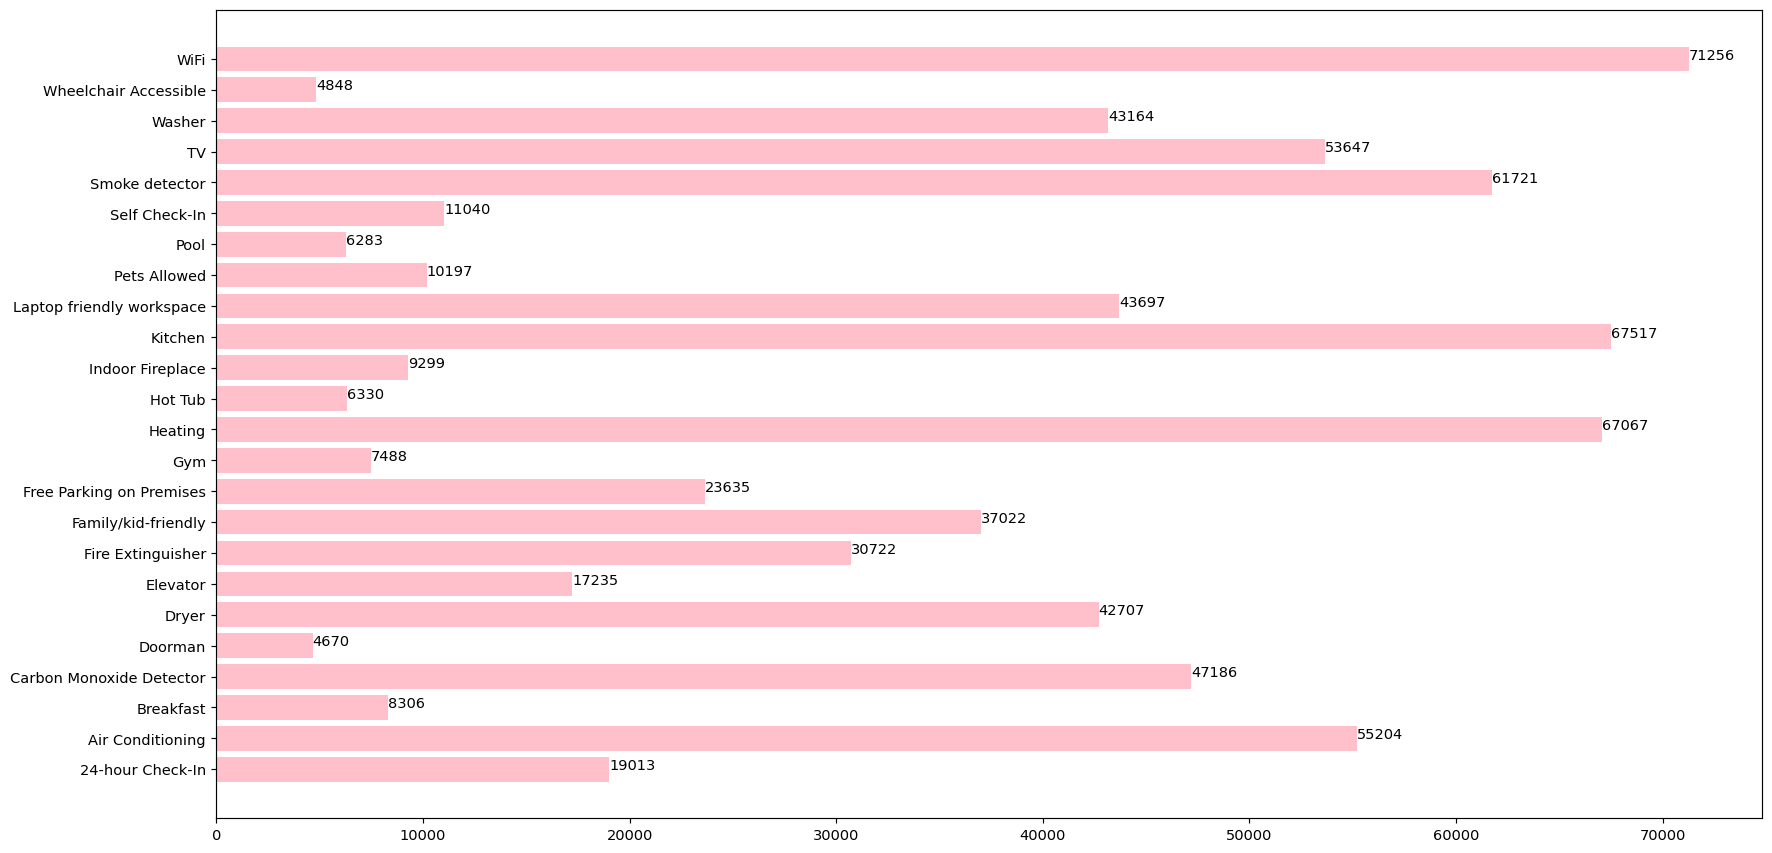

In [ ]:
#HORIZONTAL BAR DIAGRAM
amenities = ['24-hour Check-In', 'Air Conditioning', 'Breakfast',  'Carbon Monoxide Detector', 'Doorman', 'Dryer', 'Elevator', 'Fire Extinguisher', 'Family/kid-friendly', 'Free Parking on Premises', 'Gym', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Kitchen', 'Laptop friendly workspace', 'Pets Allowed', 'Pool', 'Self Check-In', 'Smoke detector', 'TV', 'Washer', 'Wheelchair Accessible', 'WiFi']
y_pos = np.arange(len(amenities))
accommodations = [CI, AC, B, CMD, DM, DR, E, FE, FKF, FPOP, G, HE, HT, IF, K, LFW, PA, P, SCI, SD, TV, W, WCA, WI]
error = np.random.rand(len(amenities))

plt.figure(figsize=(19,10), dpi=105)
#ax.invert_yaxis()

plt.barh(amenities, accommodations, xerr=error, align='center', color ='pink', ecolor = 'black')

for index, value in enumerate(accommodations):
    plt.text(value, index,
             str(value))

plt.show()

**Property_type**
After exploring the dataset further, it interesting to see that the column property_type can contain lots of different values.
By far the most common type of accommodation are Apartments or Houses. Most uncommon would be Islands or Lighthouses.
In the list you can see all available property-types.
In the graph it is only bein shown the head because the majority of the properties can be sorted to one of the first 5 categories.

Apartment             49001
House                 16509
Condominium            2657
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Train                     2
Cave                      2
Casa particular           1
Parking Space             1
Lighthouse                1
Island                    1
Name: property_type,

Text(0.5, 1.0, 'Top 5 property types:')

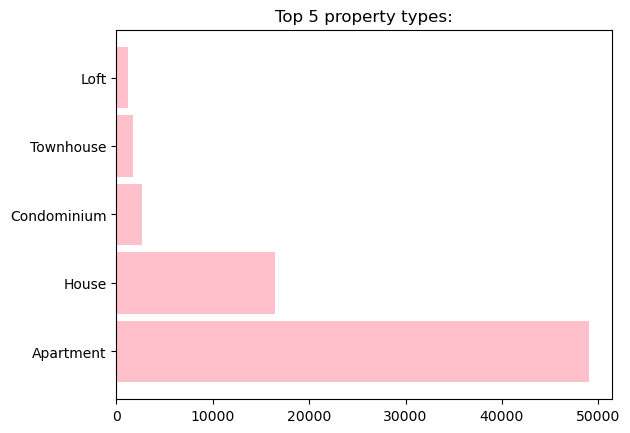

<Figure size 10000x2000 with 0 Axes>

In [ ]:
print(df['property_type'].value_counts())
res_prop_type = df['property_type'].value_counts()

prop_head = res_prop_type.head()
print(prop_head)
ax = prop_head.plot.barh(color='pink', width = 0.9)
fig = plt.figure(figsize = (100, 20))
p1 = df.property_type
ax.set_title('Top 5 property types:')

#res_prop_type.columns()
#print(x)



**Room_type**
The available roomtypes in the dataset were also explored, finding that most commonly Entire homes or apartments are offered, secondly Private rooms and very few shared rooms can be found:

In [ ]:
print(df['room_type'].value_counts())

Entire home/apt    41306
Private room       30638
Shared room         2162
Name: room_type, dtype: int64


<AxesSubplot:ylabel='room_type'>

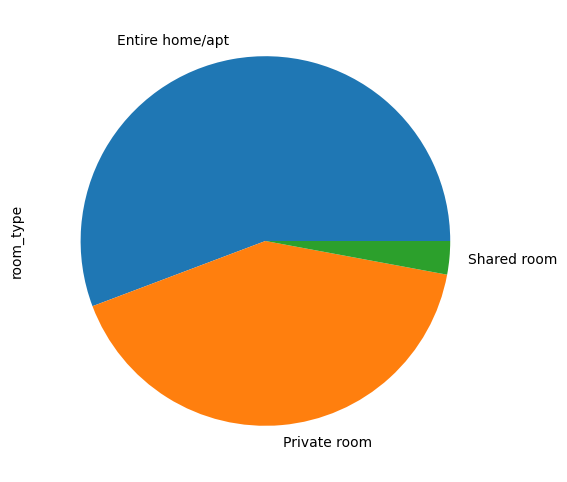

In [ ]:
df.room_type.value_counts().plot(kind='pie', figsize=(12,6))

#figsize=(28,12), autopct=autopct, labels=None
#ax = df['Sub_Category'].value_counts().plot(kind='pie', figsize=(28,12), autopct=autopct, labels=None)

<h3> Null-Handling </h3>

The columns host_response_rate and review scores rating have a significant number of null values.
In the columns bathrooms, host_has_profile_pic, Host_identity_verified, host_since, neighbourhood, bedrooms and beds the rows where null-values can be found - all of them are representing under 10 % of the dataset - can simply be dropped.

For the columns host_response_rate and reviews_score_rating it was inserted the mean value of the column because both of these columns contain over 20 % of null-values.
As the host_response_rate is of the type object and has '%' after each value it will first be moved the %-sign and then parse the object to datatype float so the mean of all values can be calculated.

In [ ]:
df.isnull().sum()

log_price                        0
property_type                    0
room_type                        0
Air_conditioning                 0
Breakfast                        0
Carbon_monoxide_detector         0
Doorman                          0
Dryer                            0
Elevator                         0
Family_kid_friendly              0
Fire_extinguisher                0
Free_parking_on_premises         0
Gym                              0
Heating                          0
Hot_tub                          0
Indoor_fireplace                 0
Kitchen                          0
Laptop_friendly_workspace        0
Pets_allowed                     0
Pool                             0
Self_CheckIn                     0
Smoke_detector                   0
TV                               0
Washer                           0
Wheelchair_accessible            0
Wireless_Internet                0
twentyfourhour_checkin           0
accommodates                     0
bathrooms           

In [ ]:
df.dropna(subset = ['bedrooms', 'beds', 'neighbourhood', 'host_since', 'host_has_profile_pic', 'bathrooms'], inplace = True)

In [ ]:
df.property_type

0        Apartment
1        Apartment
2        Apartment
3            House
4        Apartment
           ...    
74106    Apartment
74107    Apartment
74108    Apartment
74109    Apartment
74110         Boat
Name: property_type, Length: 66730, dtype: object

In [ ]:
mean = df['review_scores_rating'].mean()
print((mean))

94.08743768885809


Filling the null-values with the mean - when deciding between mean or median after all the mean was taken as in order not to alter the mean of the existing values:

In [ ]:
df['review_scores_rating'].fillna(mean, inplace=True)

In [ ]:
df.review_scores_rating.isnull().sum()

0

In [ ]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')

In [ ]:
df['host_response_rate']

0        NaN
1        100
2        100
3        NaN
4        100
        ... 
74106    NaN
74107    100
74108    100
74109    100
74110    100
Name: host_response_rate, Length: 66730, dtype: object

In [ ]:
df['host_response_rate'] = df['host_response_rate'].astype(float)

In [ ]:
mean = df['host_response_rate'].mean()
print((mean))

94.50817526478998


In [ ]:
df['host_response_rate'].fillna(mean, inplace=True)

In [ ]:
df.host_response_rate.isnull().sum()

0

<h3> Measuring Correlations </h3>

In the following section the focus is on trying to find the variables which have a high correlation with the target variable log_price:

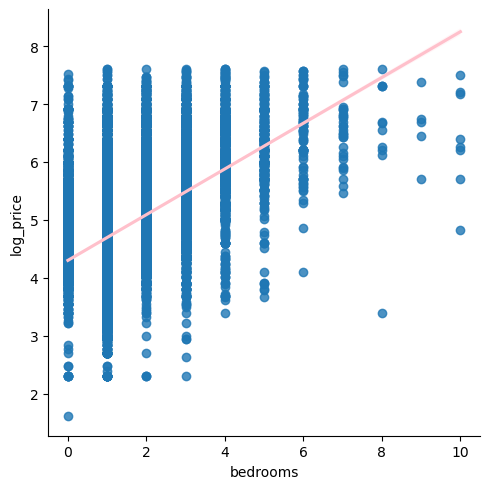

In [ ]:
sns.lmplot(x="bedrooms", y="log_price", data=df, line_kws={'color': 'pink'})

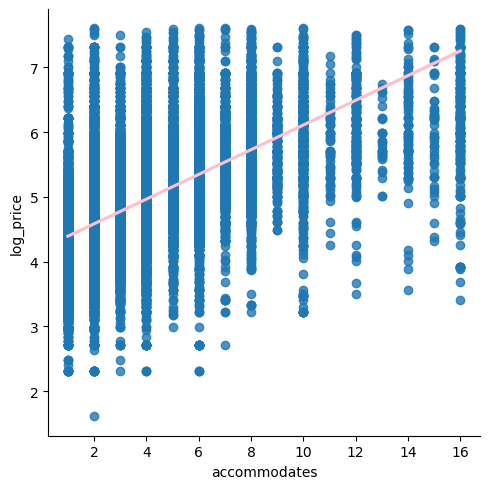

In [ ]:
sns.lmplot(x="accommodates", y="log_price", data=df, line_kws={'color': 'pink'})

Above it can be seen that the line presenting the correlation with the 'accommadtes'-column has a positive inclination, meaning that this variable has influence on the log_price.

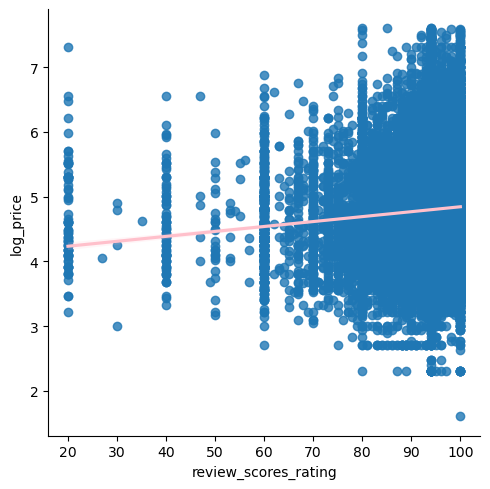

In [ ]:
sns.lmplot(x="review_scores_rating", y="log_price", data=df, line_kws={'color': 'pink'})

From the visualization above it can be concluded that the review_scores_rating does not have a high correlation with the log_price and is therefore not influencing the price a lot.

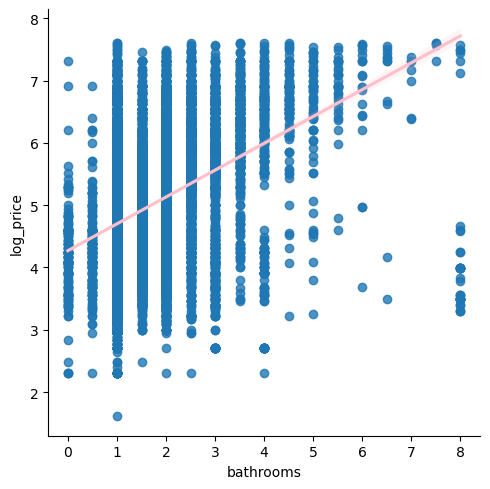

In [ ]:
sns.lmplot(x="bathrooms", y="log_price", data=df, line_kws={'color': 'pink'})

From the correlation between log_price and bathrooms above it can be concluded that the higher the number of bathrooms, the higher the price will be.

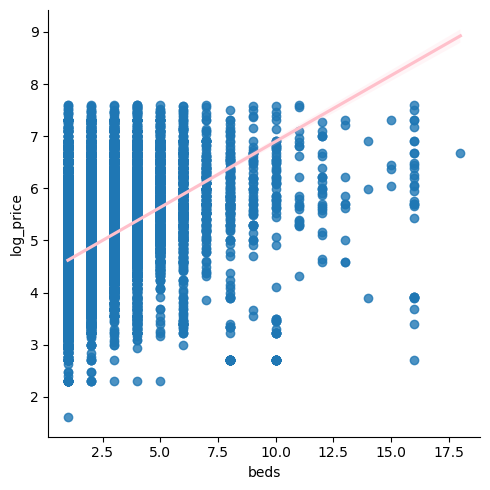

In [ ]:
sns.lmplot(x="beds", y="log_price", data=df, line_kws={'color': 'pink'})


From the visualization above it can be seen a rather strong correlation between log_price and number of beds of an accommodation.

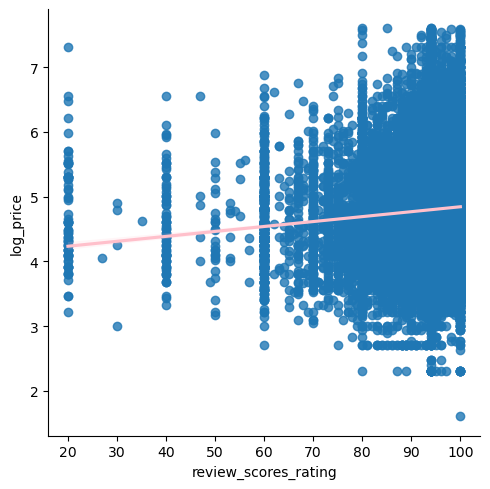

In [ ]:
sns.lmplot(x="review_scores_rating", y="log_price", data=df, line_kws={'color': 'pink'})

Above it can be seen that there is almost no correlation beween log_price and review_scores_rating.

In [ ]:
df.room_type

0        Entire home/apt
1        Entire home/apt
2        Entire home/apt
3        Entire home/apt
4        Entire home/apt
              ...       
74106       Private room
74107    Entire home/apt
74108    Entire home/apt
74109    Entire home/apt
74110    Entire home/apt
Name: room_type, Length: 66730, dtype: object

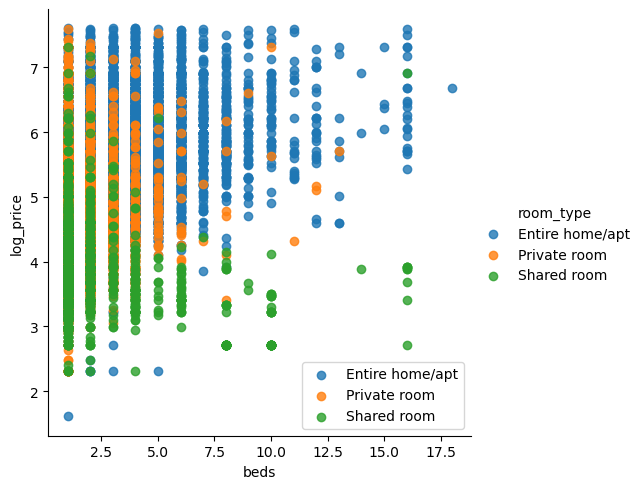

In [ ]:
sns.lmplot(x="beds", y="log_price", fit_reg = False, hue = 'room_type',
          data = df)

plt.legend(loc='lower right')


Above it can be seen the correlation between beds and log_price again, adding the subset of the roomtypes.

In [ ]:
#df.hist(column='bedrooms', bins =8)

<h3> Dropping imbalanced columns </h3>

Below are displayed histograms of the columns of the dataset to see if the values within the columns are balanced or not.

C:\Users\dilan\AppData\Local\Temp\ipykernel_25896\1321818088.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'log_price'}>,
        <AxesSubplot:title={'center':'Air_conditioning'}>,
        <AxesSubplot:title={'center':'Breakfast'}>,
        <AxesSubplot:title={'center':'Carbon_monoxide_detector'}>,
        <AxesSubplot:title={'center':'Doorman'}>,
        <AxesSubplot:title={'center':'Dryer'}>],
       [<AxesSubplot:title={'center':'Elevator'}>,
        <AxesSubplot:title={'center':'Family_kid_friendly'}>,
        <AxesSubplot:title={'center':'Fire_extinguisher'}>,
        <AxesSubplot:title={'center':'Free_parking_on_premises'}>,
        <AxesSubplot:title={'center':'Gym'}>,
        <AxesSubplot:title={'center':'Heating'}>],
       [<AxesSubplot:title={'center':'Hot_tub'}>,
        <AxesSubplot:title={'center':'Indoor_fireplace'}>,
        <AxesSubplot:title={'center':'Kitchen'}>,
        <AxesSubplot:title={'center':'Laptop_friendly_workspace'}>,
        <AxesSubplot:title={'center':'Pets_allowed'}>,
        <AxesSubplot:title={'center':'Pool'}>],
    

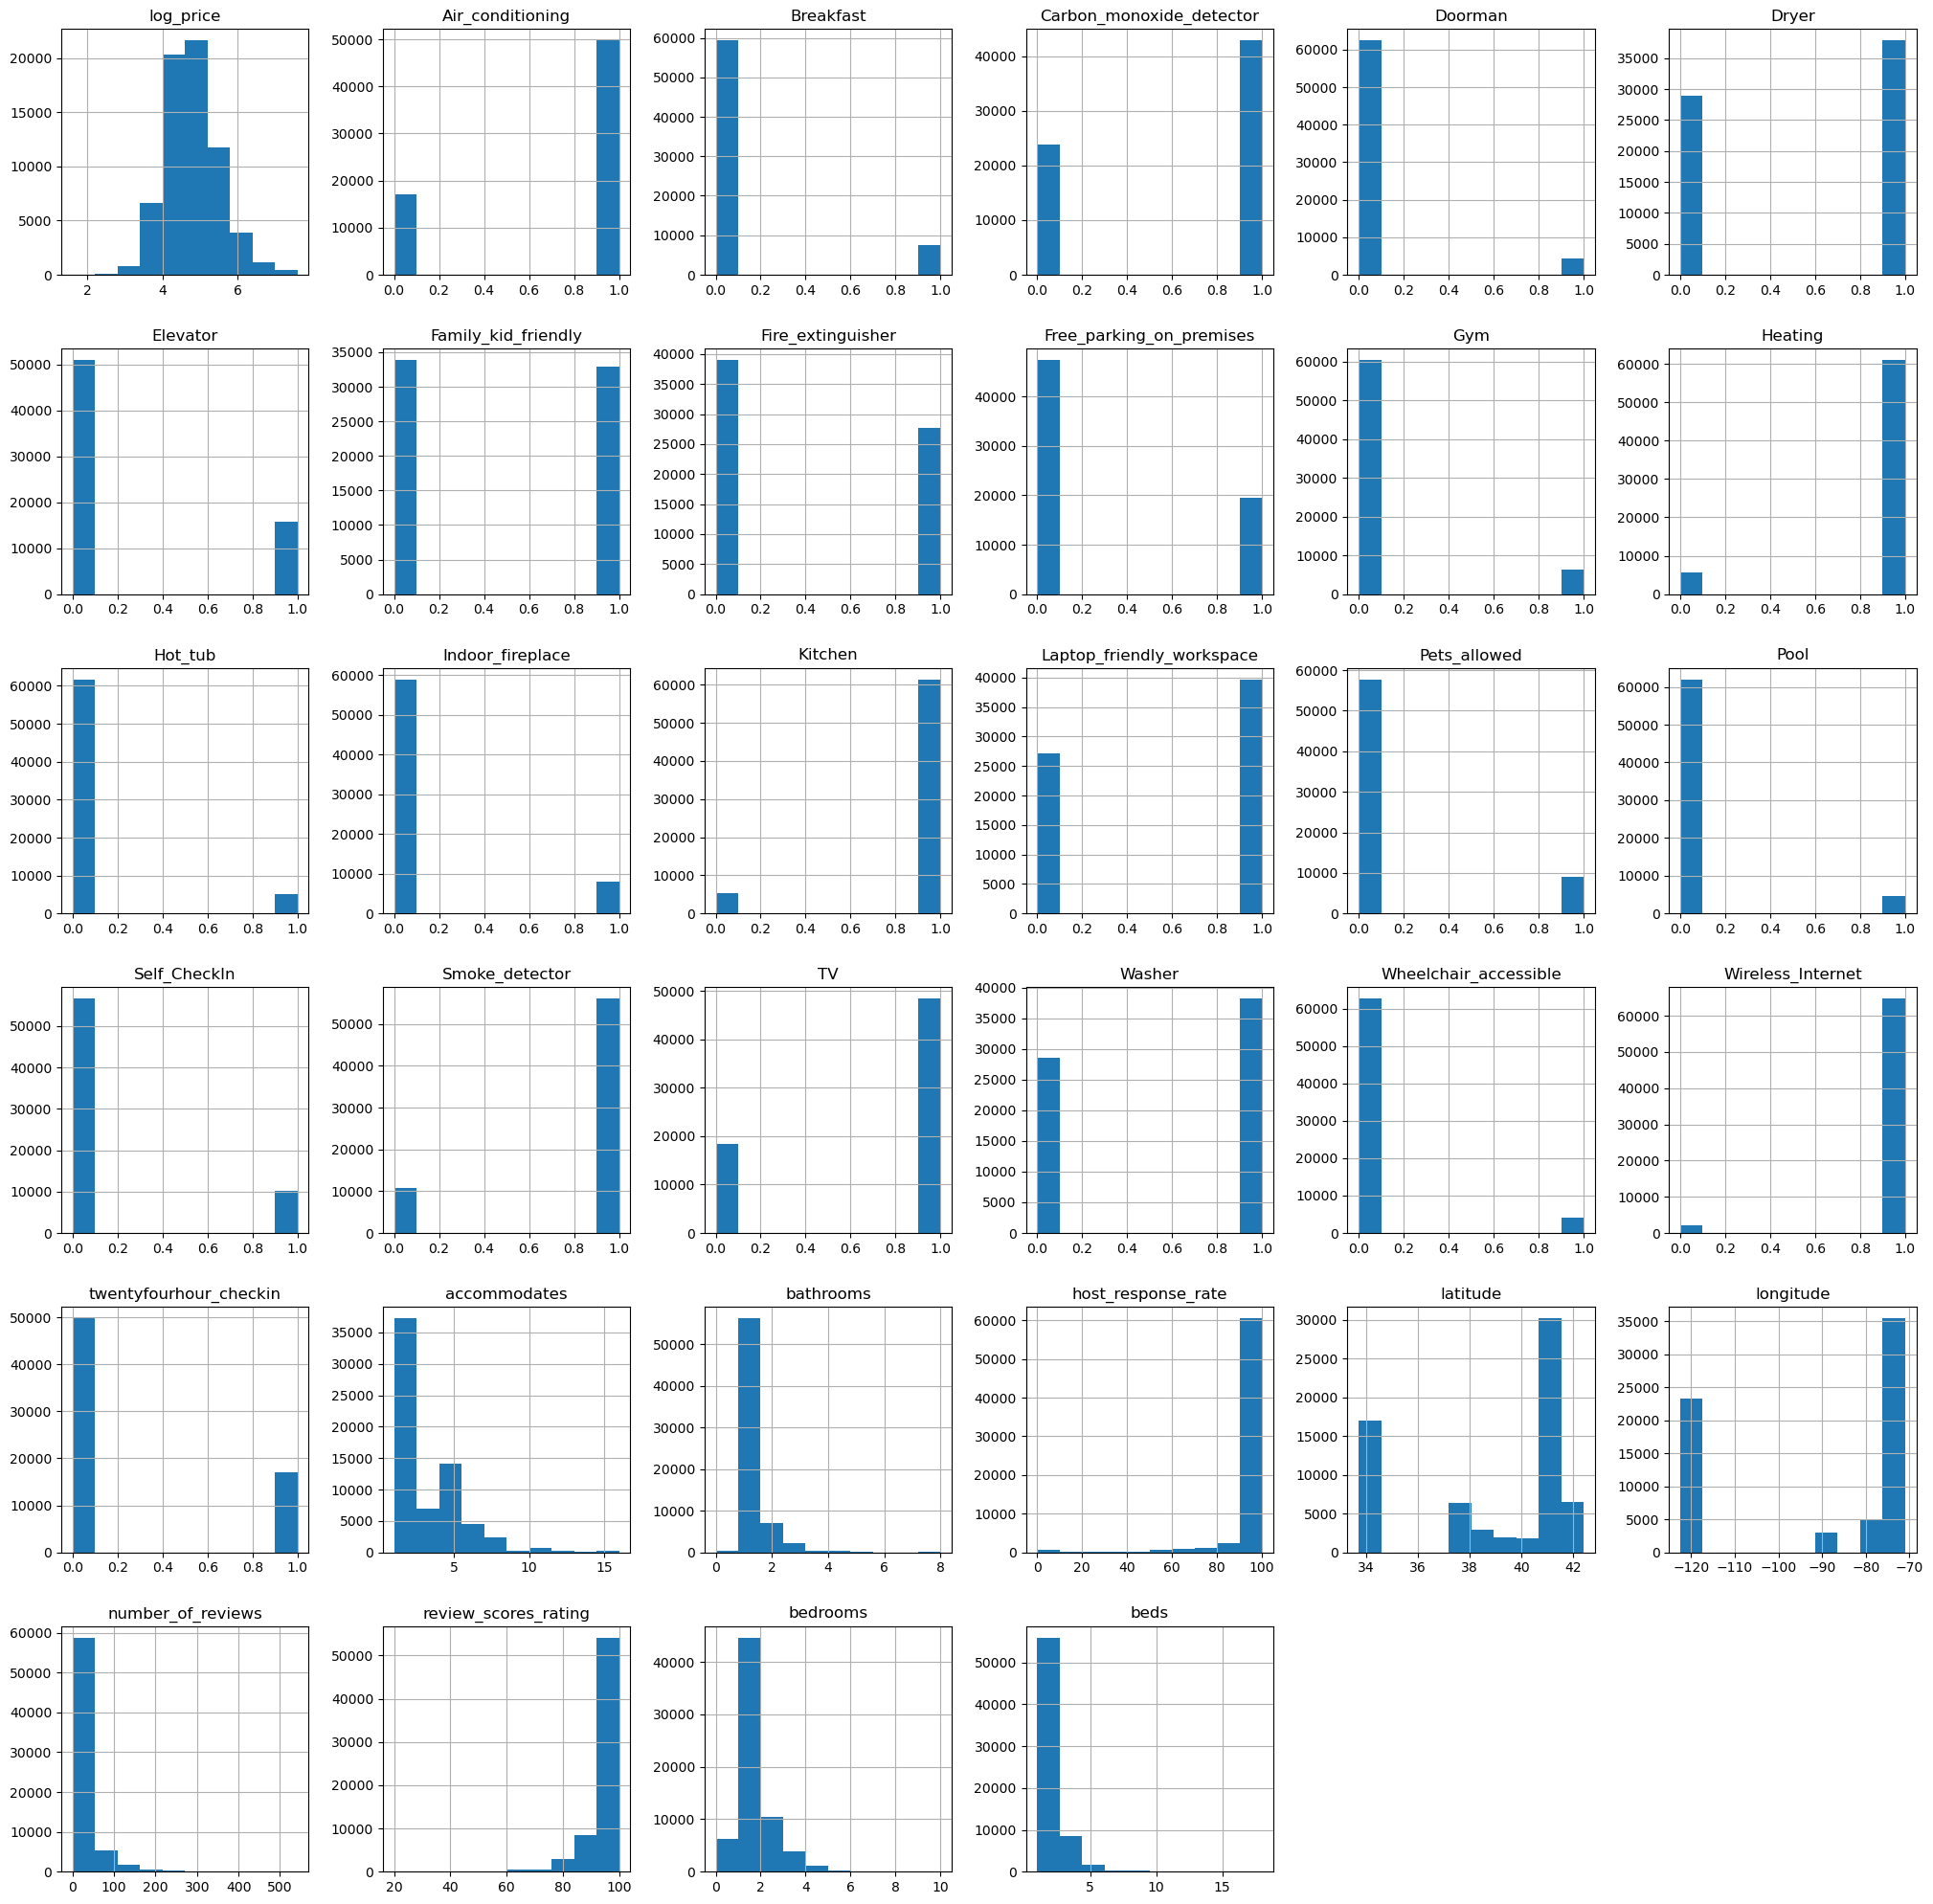

In [ ]:
fig = plt.figure(figsize = (25,25))
ax = fig.gca()
df.hist(ax = ax)

Since the imbalanced columns influence the algorithms perfomance negatively, it was decided to drop the most imbalanced ones:

In [ ]:
df.drop(columns =["Breakfast","Doorman","Gym","Heating","Hot_tub","Indoor_fireplace","Kitchen","Pets_allowed","Pool","Self_CheckIn","Smoke_detector","Wheelchair_accessible", "host_response_rate","Wireless_Internet"],inplace = True)

Some variables have very little apperance of some data. This imbalance can also influence the algorithm performace negatively. Values with few appearances were removed.

In [ ]:
df = df[(df['log_price'] > 3.5)&(df['log_price'] < 6)]

<h3> Handling Outliers </h3>

Now let's check the dataset for first information about minimum values, maximum values and the mean.

In [ ]:
df.describe()

log_price  Air_conditioning  Carbon_monoxide_detector         Dryer  \
count  62079.000000      62079.000000              62079.000000  62079.000000   
mean       4.731544          0.746468                  0.642101      0.554229   
std        0.567742          0.435036                  0.479386      0.497054   
min        3.526361          0.000000                  0.000000      0.000000   
25%        4.317488          0.000000                  0.000000      0.000000   
50%        4.700480          1.000000                  1.000000      1.000000   
75%        5.164786          1.000000                  1.000000      1.000000   
max        5.998937          1.000000                  1.000000      1.000000   

           Elevator  Family_kid_friendly  Fire_extinguisher  \
count  62079.000000         62079.000000       62079.000000   
mean       0.236441             0.483916           0.408463   
std        0.424899             0.499745           0.491554   
min        0.000000             0.000000           0.000000   
25%        0.000000             0.000000           0.000000   
50%        0.000000             0.000000           0.000000   
75%        0.000000             1.000000           1.000000   
max        1.000000             1.000000           1.000000   

       Free_parking_on_premises  Laptop_friendly_workspace            TV  \
count              62079.000000               62079.000000  62079.000000   
mean                   0.282495                   0.591714      0.719341   
std                    0.450216                   0.491521      0.449325   
min                    0.000000                   0.000000      0.000000   
25%                    0.000000                   0.000000      0.000000   
50%                    0.000000                   1.000000      1.000000   
75%                    1.000000                   1.000000      1.000000   
max                    1.000000                   1.000000      1.000000   

             Washer  twentyfourhour_checkin  accommodates     bathrooms  \
count  62079.000000            62079.000000  62079.000000  62079.000000   
mean       0.559593                0.253000      2.966784      1.171483   
std        0.496440                0.434735      1.844679      0.446468   
min        0.000000                0.000000      1.000000      0.000000   
25%        0.000000                0.000000      2.000000      1.000000   
50%        1.000000                0.000000      2.000000      1.000000   
75%        1.000000                1.000000      4.000000      1.000000   
max        1.000000                1.000000     16.000000      8.000000   

           latitude     longitude  number_of_reviews  review_scores_rating  \
count  62079.000000  62079.000000       62079.000000          62079.000000   
mean      38.795743    -90.256530          22.213969             94.082451   
std        2.947639     21.341262          39.393574              6.816248   
min       33.705835   -122.511500           0.000000             20.000000   
25%       34.249644   -118.322828           1.000000             93.000000   
50%       40.683553    -73.997403           6.000000             94.087438   
75%       40.755402    -73.950313          25.000000             99.000000   
max       42.390437    -70.985047         542.000000            100.000000   

           bedrooms          beds  
count  62079.000000  62079.000000  
mean       1.184990      1.603747  
std        0.728544      1.057343  
min        0.000000      1.000000  
25%        1.000000      1.000000  
50%        1.000000      1.000000  
75%        1.000000      2.000000  
max       10.000000     16.000000

As it can be seen in the images below, most of the variables have outliers. The were removedin a way that the correlation with the log_price high could be kept.

C:\Users\dilan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='accommodates'>

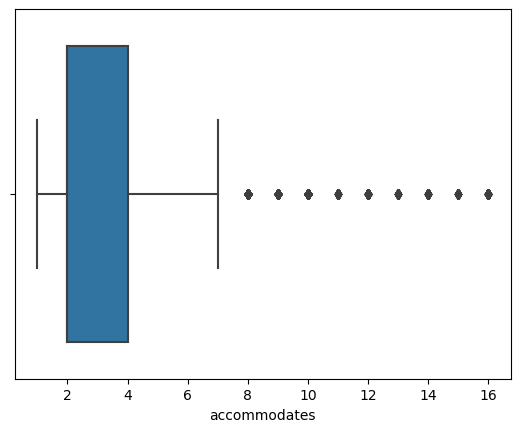

In [ ]:
sns.boxplot(df.accommodates)

The outliers for accommodates won't be removed because it reduces the correlation of all the variables with log_price.

C:\Users\dilan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms'>

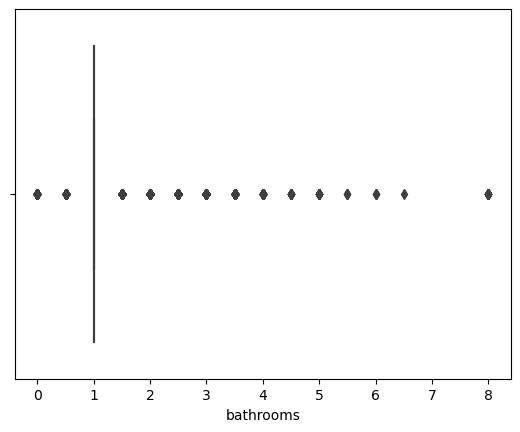

In [ ]:
sns.boxplot(df.bathrooms)

In [ ]:
df = df[df['bathrooms'] < 7]

C:\Users\dilan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

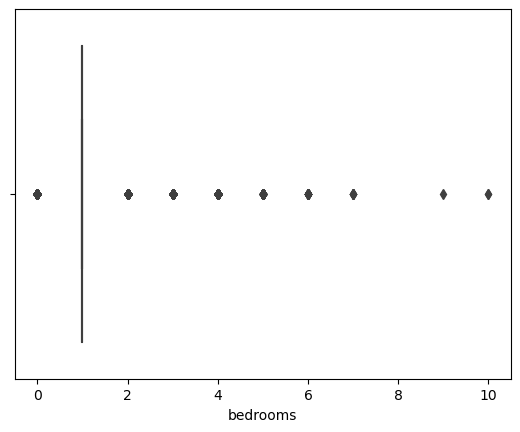

In [ ]:
sns.boxplot(df.bedrooms)

In [ ]:
df = df[df['bedrooms'] < 8]

C:\Users\dilan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='beds'>

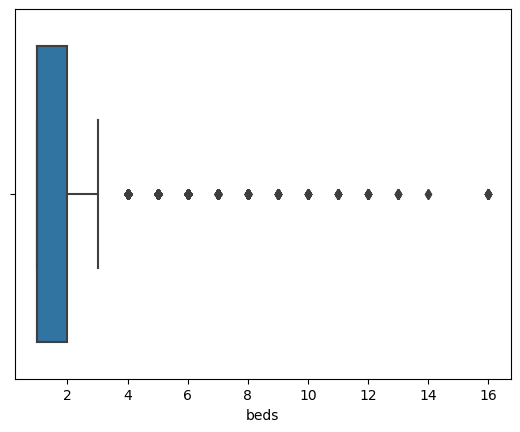

In [ ]:
sns.boxplot(df.beds)

In [ ]:
df = df[df['beds'] < 8]

The 5 variables below (namely: accommodates, bathrooms, bedrooms, cleaning fee and beds) have a significant correlation with the target variable log_price.

<AxesSubplot:>

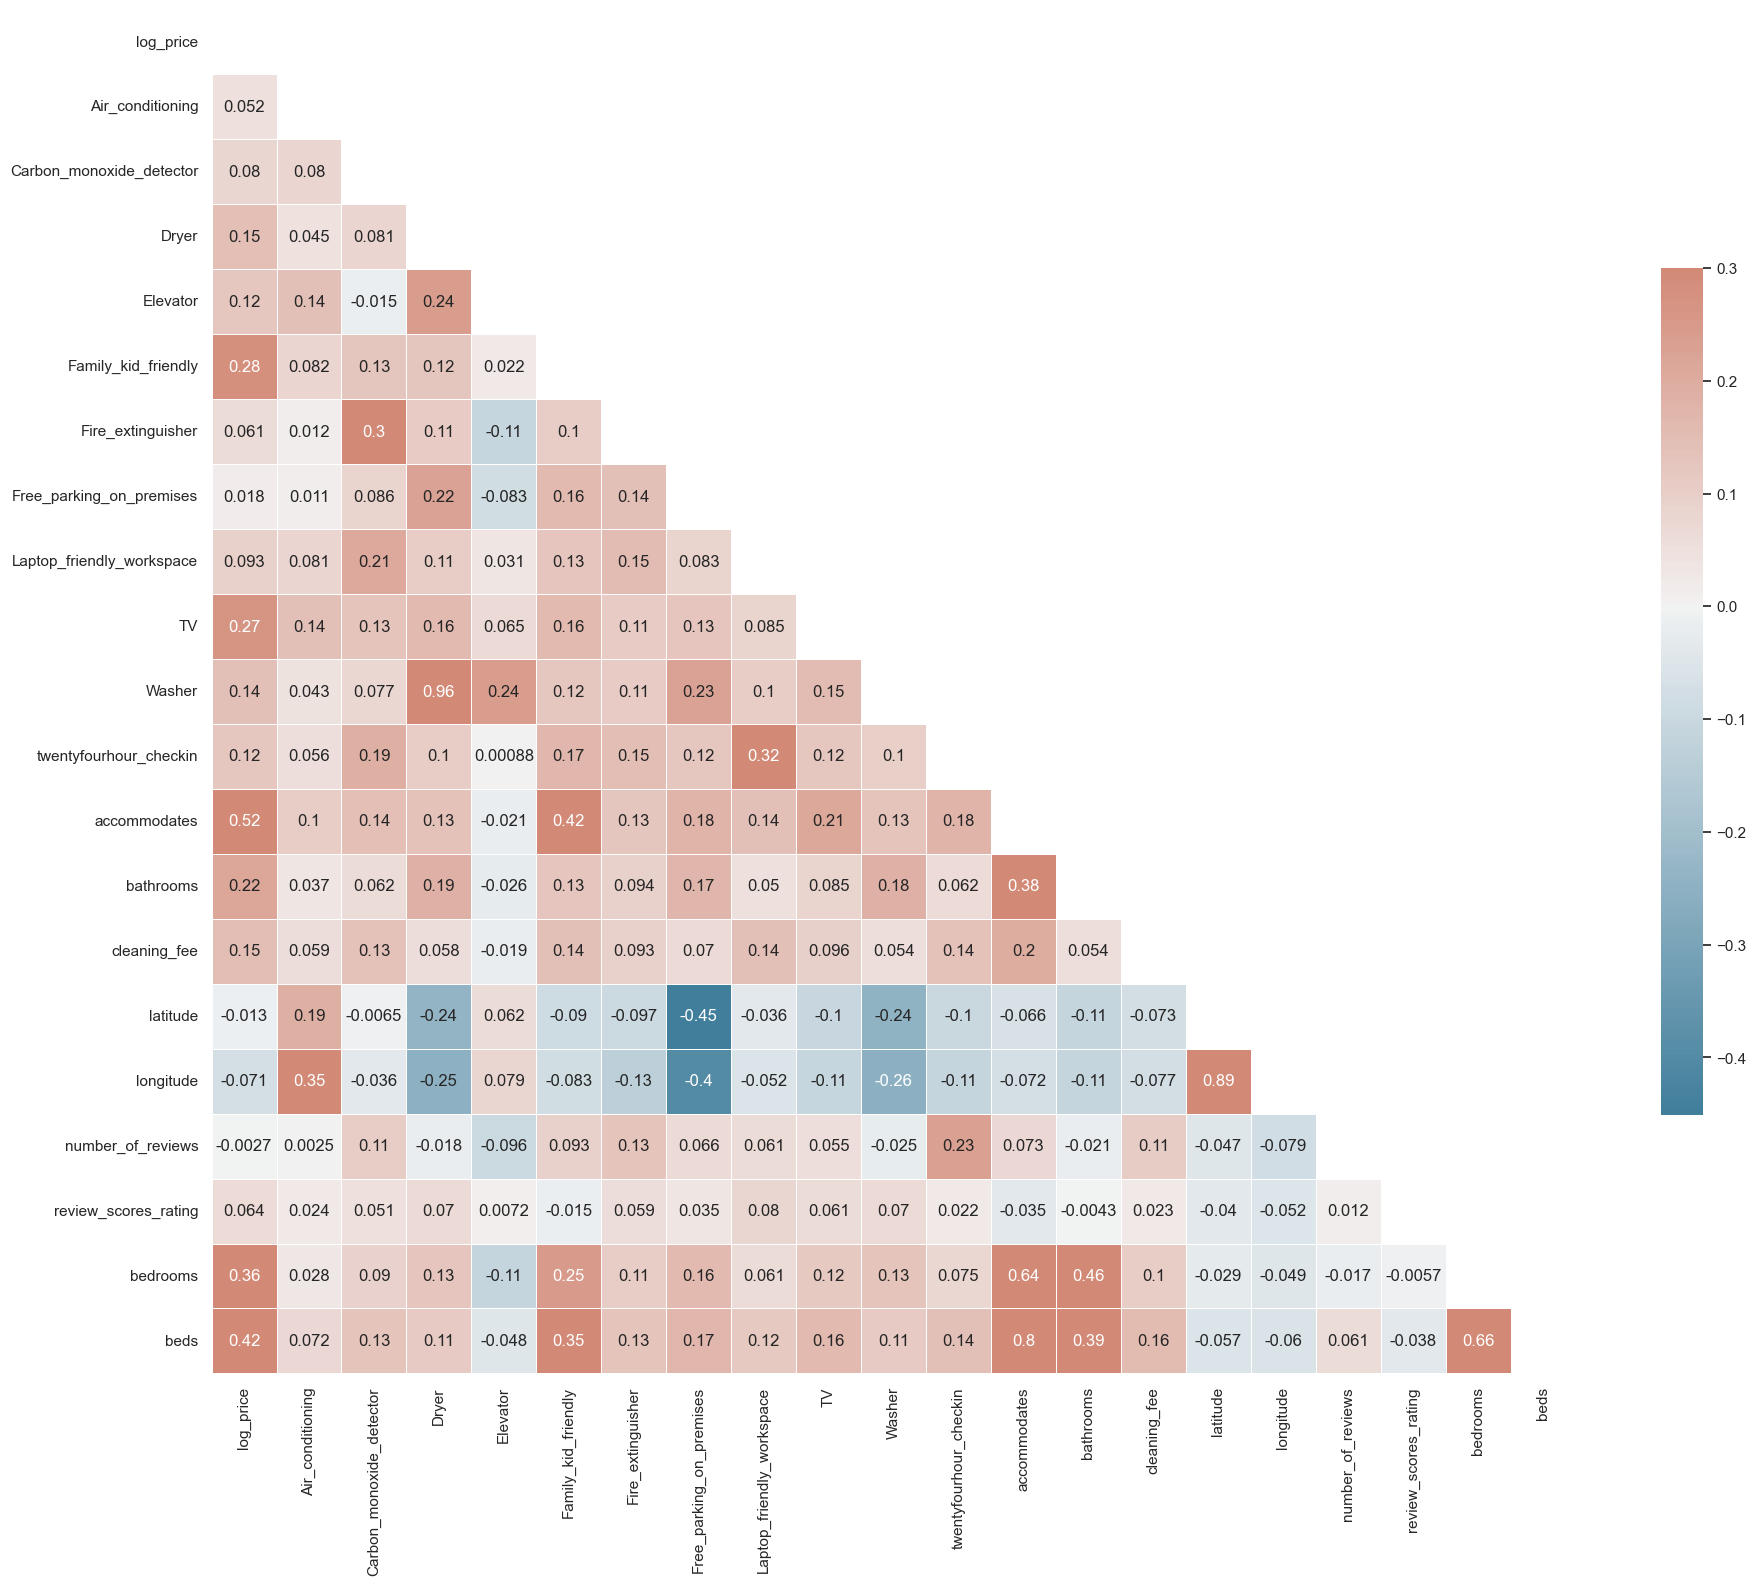

In [ ]:
sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(22, 22))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df.drop(columns=['review_scores_rating','number_of_reviews','Free_parking_on_premises','Fire_extinguisher','Air_conditioning'],inplace=True)

In [ ]:
City = df.city
df['City'] = City
Room_type = df.room_type
df['Room_type'] = Room_type

In [ ]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'Carbon_monoxide_detector',
       'Dryer', 'Elevator', 'Family_kid_friendly', 'Laptop_friendly_workspace',
       'TV', 'Washer', 'twentyfourhour_checkin', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_since',
       'instant_bookable', 'latitude', 'longitude', 'name', 'neighbourhood',
       'bedrooms', 'beds', 'City', 'Room_type'],
      dtype='object')

In [ ]:
df.city.unique()

array(['NYC', 'DC', 'SF', 'LA', 'Chicago', 'Boston'], dtype=object)

In [ ]:
df2 = df
NYC = []
for dados in df2['city']:
    if dados == 'NYC':
        NYC.append('1')
    else:
         NYC.append('0')
df2['NYC'] = NYC
df = df2
df.tail()

log_price property_type        room_type  Carbon_monoxide_detector  \
74106   4.605170     Apartment     Private room                         0   
74107   5.043425     Apartment  Entire home/apt                         0   
74108   5.220356     Apartment  Entire home/apt                         0   
74109   5.273000     Apartment  Entire home/apt                         0   
74110   4.852030          Boat  Entire home/apt                         0   

       Dryer  Elevator  Family_kid_friendly  Laptop_friendly_workspace  TV  \
74106      0         0                    0                          0   0   
74107      0         0                    0                          0   0   
74108      0         0                    0                          0   0   
74109      0         0                    0                          0   0   
74110      0         0                    0                          0   0   

       Washer  ...  instant_bookable   latitude   longitude  \
74106       0  ...                 f  40.709025  -73.939405   
74107       0  ...                 f  33.871549 -118.396053   
74108       0  ...                 t  40.706749  -73.942377   
74109       0  ...                 t  40.738535  -74.000157   
74110       0  ...                 f  33.761096 -118.192409   

                                             name  neighbourhood  bedrooms  \
74106                           one room bushwick   Williamsburg       1.0   
74107                Spacious Hermosa 2 BR on PCH  Hermosa Beach       2.0   
74108  Modern 2 Bedroom Apartment in Williamsburg   Williamsburg       2.0   
74109        Designer's Apartment in HEART of NYC   West Village       0.0   
74110              Cozy Boat at Shoreline Village     Long Beach       1.0   

      beds City        Room_type NYC  
74106  1.0  NYC     Private room   1  
74107  4.0   LA  Entire home/apt   0  
74108  2.0  NYC  Entire home/apt   1  
74109  2.0  NYC  Entire home/apt   1  
74110  2.0   LA  Entire home/apt   0  

[5 rows x 30 columns]

In [ ]:
df2 = df
SF = []
for dados in df2['city']:
    if dados == 'SF':
        SF.append('1')
    else:
         SF.append('0')
df2['SF'] = SF
df = df2
df.tail()

log_price property_type        room_type  Carbon_monoxide_detector  \
74106   4.605170     Apartment     Private room                         0   
74107   5.043425     Apartment  Entire home/apt                         0   
74108   5.220356     Apartment  Entire home/apt                         0   
74109   5.273000     Apartment  Entire home/apt                         0   
74110   4.852030          Boat  Entire home/apt                         0   

       Dryer  Elevator  Family_kid_friendly  Laptop_friendly_workspace  TV  \
74106      0         0                    0                          0   0   
74107      0         0                    0                          0   0   
74108      0         0                    0                          0   0   
74109      0         0                    0                          0   0   
74110      0         0                    0                          0   0   

       Washer  ...   latitude   longitude  \
74106       0  ...  40.709025  -73.939405   
74107       0  ...  33.871549 -118.396053   
74108       0  ...  40.706749  -73.942377   
74109       0  ...  40.738535  -74.000157   
74110       0  ...  33.761096 -118.192409   

                                             name  neighbourhood bedrooms  \
74106                           one room bushwick   Williamsburg      1.0   
74107                Spacious Hermosa 2 BR on PCH  Hermosa Beach      2.0   
74108  Modern 2 Bedroom Apartment in Williamsburg   Williamsburg      2.0   
74109        Designer's Apartment in HEART of NYC   West Village      0.0   
74110              Cozy Boat at Shoreline Village     Long Beach      1.0   

       beds City        Room_type NYC SF  
74106   1.0  NYC     Private room   1  0  
74107   4.0   LA  Entire home/apt   0  0  
74108   2.0  NYC  Entire home/apt   1  0  
74109   2.0  NYC  Entire home/apt   1  0  
74110   2.0   LA  Entire home/apt   0  0  

[5 rows x 31 columns]

In [ ]:
df2 = df
DC = []
for dados in df2['city']:
    if dados == 'DC':
        DC.append('1')
    else:
         DC.append('0')
df2['DC'] = DC
df = df2
df.tail()

log_price property_type        room_type  Carbon_monoxide_detector  \
74106   4.605170     Apartment     Private room                         0   
74107   5.043425     Apartment  Entire home/apt                         0   
74108   5.220356     Apartment  Entire home/apt                         0   
74109   5.273000     Apartment  Entire home/apt                         0   
74110   4.852030          Boat  Entire home/apt                         0   

       Dryer  Elevator  Family_kid_friendly  Laptop_friendly_workspace  TV  \
74106      0         0                    0                          0   0   
74107      0         0                    0                          0   0   
74108      0         0                    0                          0   0   
74109      0         0                    0                          0   0   
74110      0         0                    0                          0   0   

       Washer  ...   longitude                                        name  \
74106       0  ...  -73.939405                           one room bushwick   
74107       0  ... -118.396053                Spacious Hermosa 2 BR on PCH   
74108       0  ...  -73.942377  Modern 2 Bedroom Apartment in Williamsburg   
74109       0  ...  -74.000157        Designer's Apartment in HEART of NYC   
74110       0  ... -118.192409              Cozy Boat at Shoreline Village   

       neighbourhood bedrooms beds  City        Room_type NYC SF DC  
74106   Williamsburg      1.0  1.0   NYC     Private room   1  0  0  
74107  Hermosa Beach      2.0  4.0    LA  Entire home/apt   0  0  0  
74108   Williamsburg      2.0  2.0   NYC  Entire home/apt   1  0  0  
74109   West Village      0.0  2.0   NYC  Entire home/apt   1  0  0  
74110     Long Beach      1.0  2.0    LA  Entire home/apt   0  0  0  

[5 rows x 32 columns]

In [ ]:
df2 = df
NYC = []
for dados in df2['city']:
    if dados == 'NYC':
        NYC.append('1')
    else:
         NYC.append('0')
df2['NYC'] = NYC
df = df2
df.tail()

log_price property_type        room_type  Carbon_monoxide_detector  \
74106   4.605170     Apartment     Private room                         0   
74107   5.043425     Apartment  Entire home/apt                         0   
74108   5.220356     Apartment  Entire home/apt                         0   
74109   5.273000     Apartment  Entire home/apt                         0   
74110   4.852030          Boat  Entire home/apt                         0   

       Dryer  Elevator  Family_kid_friendly  Laptop_friendly_workspace  TV  \
74106      0         0                    0                          0   0   
74107      0         0                    0                          0   0   
74108      0         0                    0                          0   0   
74109      0         0                    0                          0   0   
74110      0         0                    0                          0   0   

       Washer  ...   longitude                                        name  \
74106       0  ...  -73.939405                           one room bushwick   
74107       0  ... -118.396053                Spacious Hermosa 2 BR on PCH   
74108       0  ...  -73.942377  Modern 2 Bedroom Apartment in Williamsburg   
74109       0  ...  -74.000157        Designer's Apartment in HEART of NYC   
74110       0  ... -118.192409              Cozy Boat at Shoreline Village   

       neighbourhood bedrooms beds  City        Room_type NYC SF DC  
74106   Williamsburg      1.0  1.0   NYC     Private room   1  0  0  
74107  Hermosa Beach      2.0  4.0    LA  Entire home/apt   0  0  0  
74108   Williamsburg      2.0  2.0   NYC  Entire home/apt   1  0  0  
74109   West Village      0.0  2.0   NYC  Entire home/apt   1  0  0  
74110     Long Beach      1.0  2.0    LA  Entire home/apt   0  0  0  

[5 rows x 32 columns]

In [ ]:
df2 = df
Boston = []
for dados in df2['city']:
    if dados == 'Boston':
        Boston.append('1')
    else:
         Boston.append('0')
df2['Boston'] = Boston
df = df2
df.head()

log_price property_type        room_type  Carbon_monoxide_detector  Dryer  \
0   5.010635     Apartment  Entire home/apt                         0      0   
1   5.129899     Apartment  Entire home/apt                         0      1   
2   4.976734     Apartment  Entire home/apt                         1      0   
4   4.744932     Apartment  Entire home/apt                         1      0   
5   4.442651     Apartment     Private room                         1      0   

   Elevator  Family_kid_friendly  Laptop_friendly_workspace  TV  Washer  ...  \
0         0                    1                          0   0       0  ...   
1         0                    1                          0   0       1  ...   
2         0                    1                          1   1       0  ...   
4         1                    0                          0   1       0  ...   
5         0                    0                          1   1       0  ...   

                                       name     neighbourhood  bedrooms beds  \
0            Beautiful brownstone 1-bedroom  Brooklyn Heights       1.0  1.0   
1  Superb 3BR Apt Located Near Times Square    Hell's Kitchen       3.0  3.0   
2                          The Garden Oasis            Harlem       1.0  3.0   
4                Great studio in midtown DC  Columbia Heights       0.0  1.0   
5               Comfort Suite San Francisco        Noe Valley       1.0  1.0   

  City        Room_type NYC SF DC Boston  
0  NYC  Entire home/apt   1  0  0      0  
1  NYC  Entire home/apt   1  0  0      0  
2  NYC  Entire home/apt   1  0  0      0  
4   DC  Entire home/apt   0  0  1      0  
5   SF     Private room   0  1  0      0  

[5 rows x 33 columns]

In [ ]:
df2 = df
Chicago = []
for dados in df2['city']:
    if dados == 'Chicago':
        Chicago.append('1')
    else:
         Chicago.append('0')
df2['Chicago'] = Chicago
df = df2
df.head()

log_price property_type        room_type  Carbon_monoxide_detector  Dryer  \
0   5.010635     Apartment  Entire home/apt                         0      0   
1   5.129899     Apartment  Entire home/apt                         0      1   
2   4.976734     Apartment  Entire home/apt                         1      0   
4   4.744932     Apartment  Entire home/apt                         1      0   
5   4.442651     Apartment     Private room                         1      0   

   Elevator  Family_kid_friendly  Laptop_friendly_workspace  TV  Washer  ...  \
0         0                    1                          0   0       0  ...   
1         0                    1                          0   0       1  ...   
2         0                    1                          1   1       0  ...   
4         1                    0                          0   1       0  ...   
5         0                    0                          1   1       0  ...   

      neighbourhood  bedrooms  beds City        Room_type  NYC SF DC Boston  \
0  Brooklyn Heights       1.0   1.0  NYC  Entire home/apt    1  0  0      0   
1    Hell's Kitchen       3.0   3.0  NYC  Entire home/apt    1  0  0      0   
2            Harlem       1.0   3.0  NYC  Entire home/apt    1  0  0      0   
4  Columbia Heights       0.0   1.0   DC  Entire home/apt    0  0  1      0   
5        Noe Valley       1.0   1.0   SF     Private room    0  1  0      0   

  Chicago  
0       0  
1       0  
2       0  
4       0  
5       0  

[5 rows x 34 columns]

<h3> Dummy Variables:

In a next step it will be created dummy-variables for the columns that have the datatype boolean, dividing the variables from true and false into two seperate columns (host_identity_verified_true and host_identity_varified_false) and setting the values to 1 or 0. Afterwards it will be dropped the false-column and check the correlation with the true-column.

In [ ]:
df = pd.get_dummies(df, columns=['City','Room_type'], prefix=['City','Room_type'])

<AxesSubplot:>

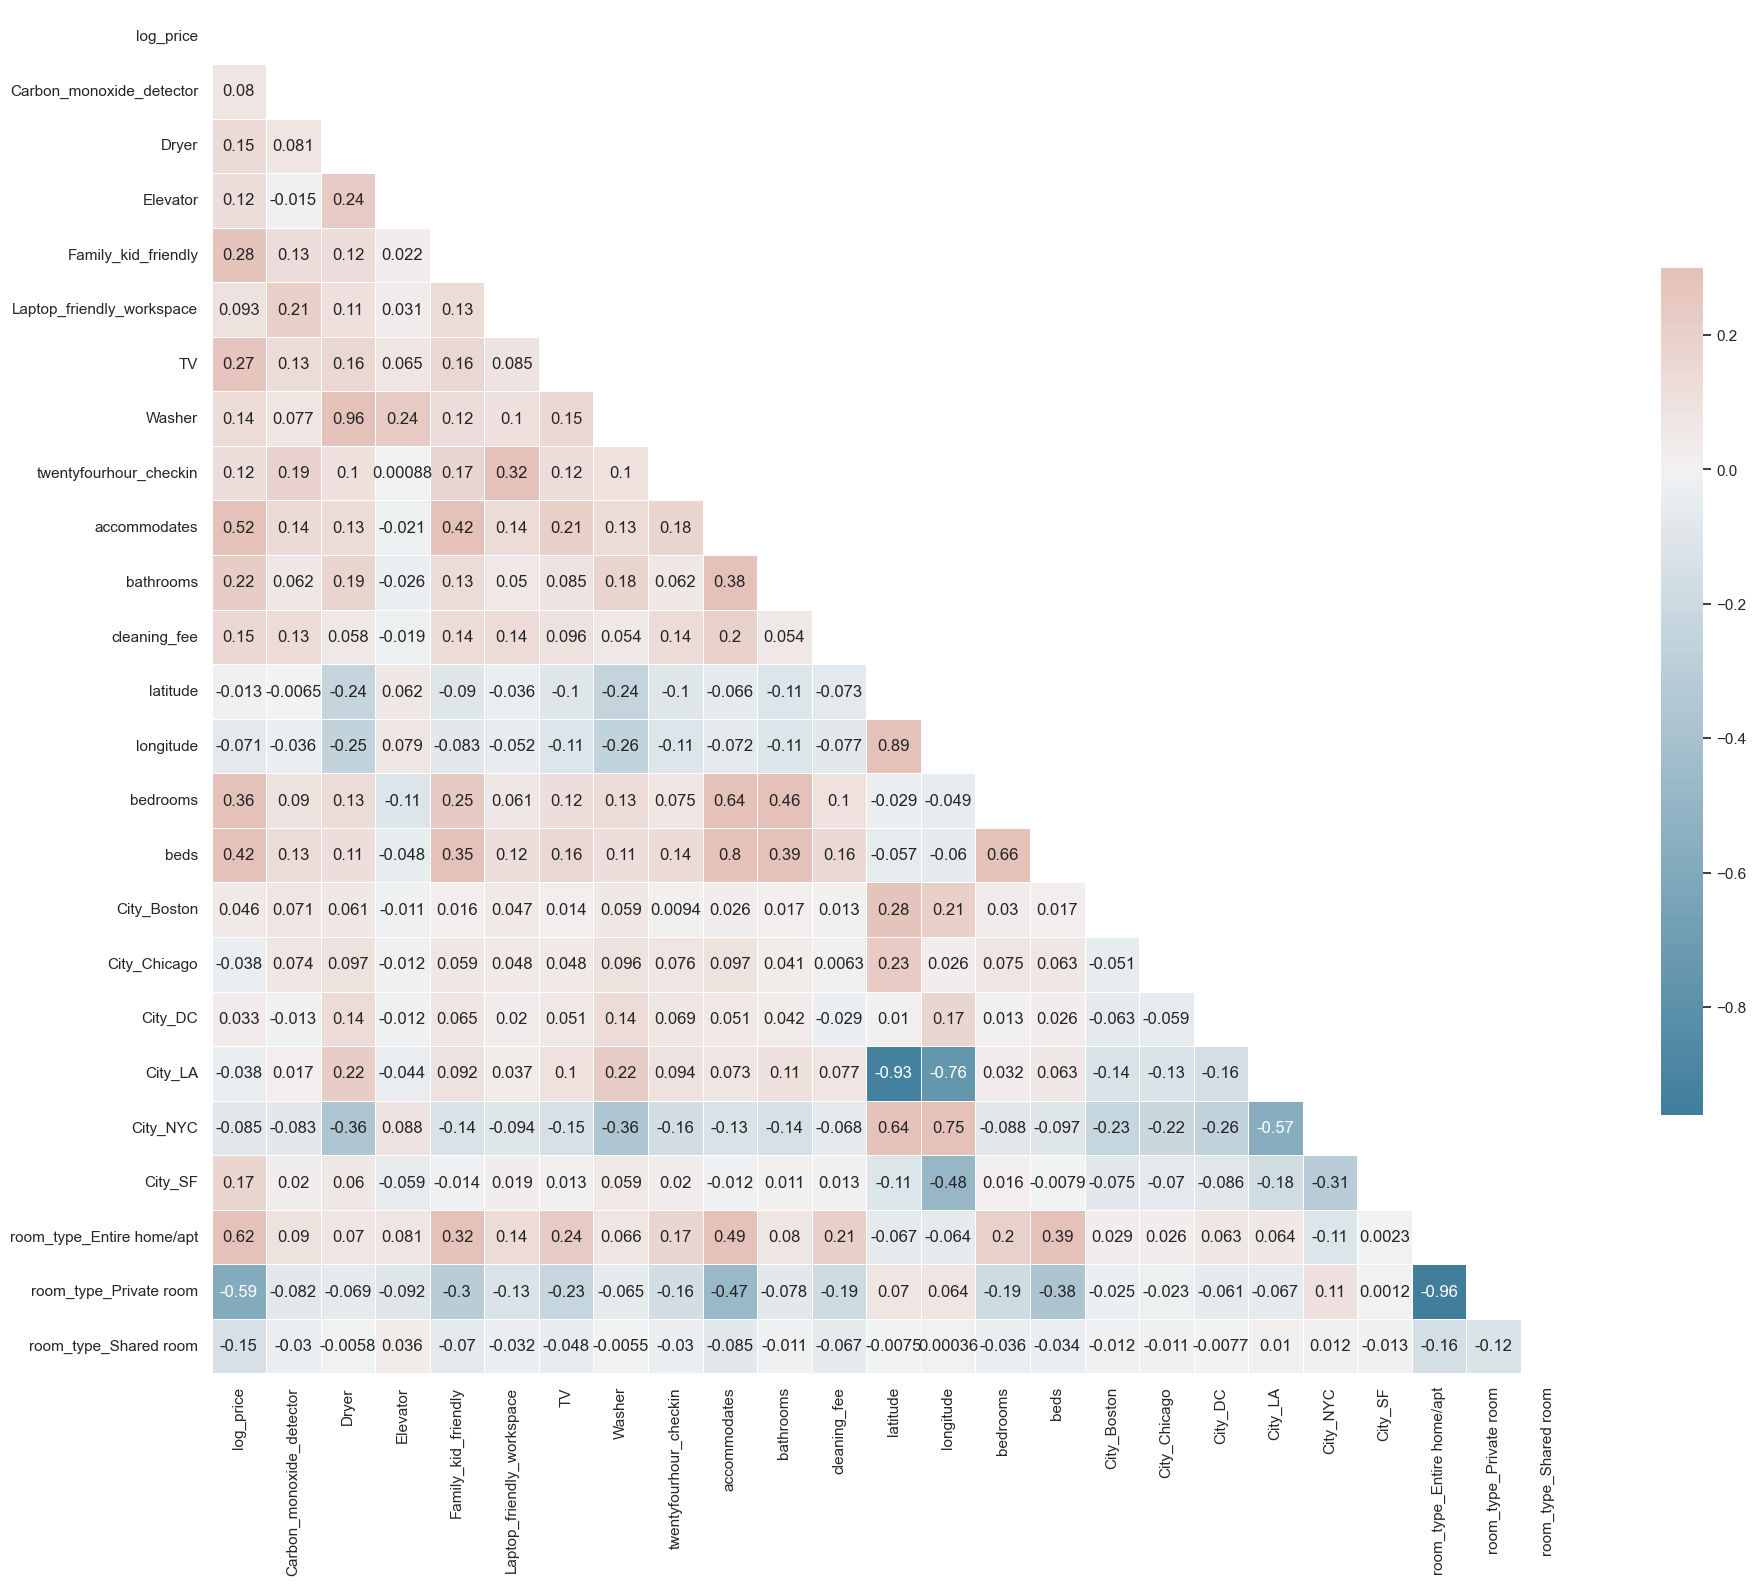

In [ ]:
sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(22, 22))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The results above shows us that the log_price correlation with room_type variables and City_SF is high. It was also tested the correlation for appartment but it is very low. Thus it won't be used in the algorithm.

In [ ]:
df.drop(columns =['City_NYC', 'City_DC', 'City_LA', 'City_Chicago', 'City_Boston'],inplace = True)

In [ ]:
#df = pd.get_dummies(df, columns=['property_type'], prefix=['property_type'])

<AxesSubplot:>

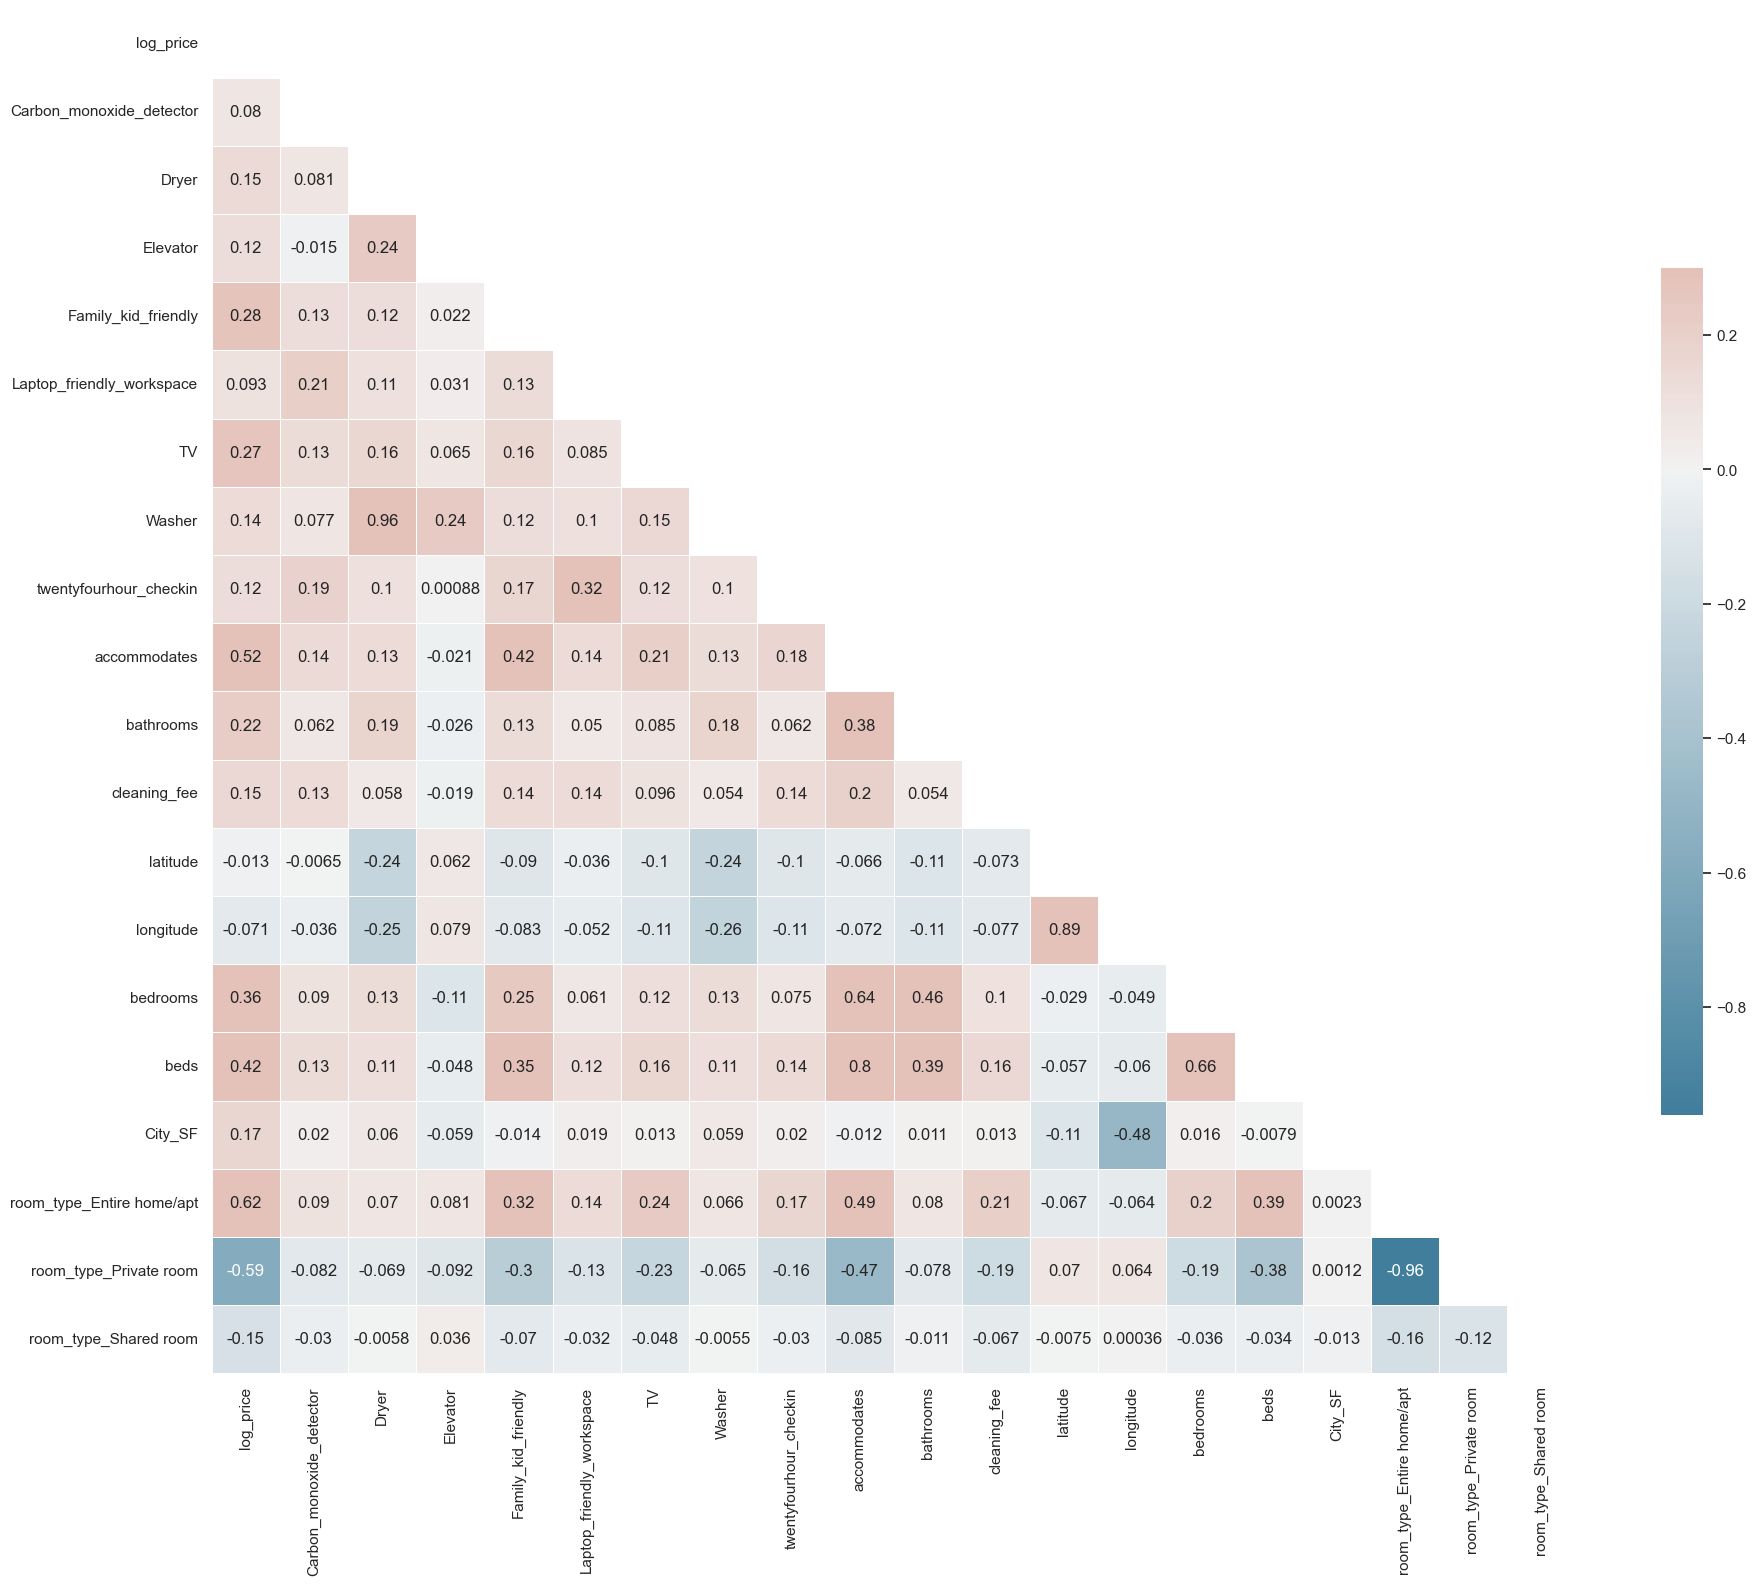

In [ ]:
sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(22, 22))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Below is a heat-map of the AirBnB-Locations, showing the concentration of accommodations in New York, Boston, Chicago, L.A., SF and DC.

In [ ]:
#!pip install folium
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

# find the row of the house which has the highest price
maxpr=df.loc[df['log_price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['latitude'], maxpr['longitude']],popup='Highest Price: $'+str(format(maxpr['log_price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['latitude','longitude','count']].groupby(['latitude','longitude']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

Below is bein shown the mean prices by city in the dataset, showing that San Francisco has the highest mean price for accommodations:

In [ ]:
df_price_city = df.groupby(['city'])['log_price'].mean().reset_index().sort_values(by='log_price')
df_price_city

city  log_price
1  Chicago   4.631155
4      NYC   4.681248
3       LA   4.692655
2       DC   4.799162
0   Boston   4.840691
5       SF   5.026847

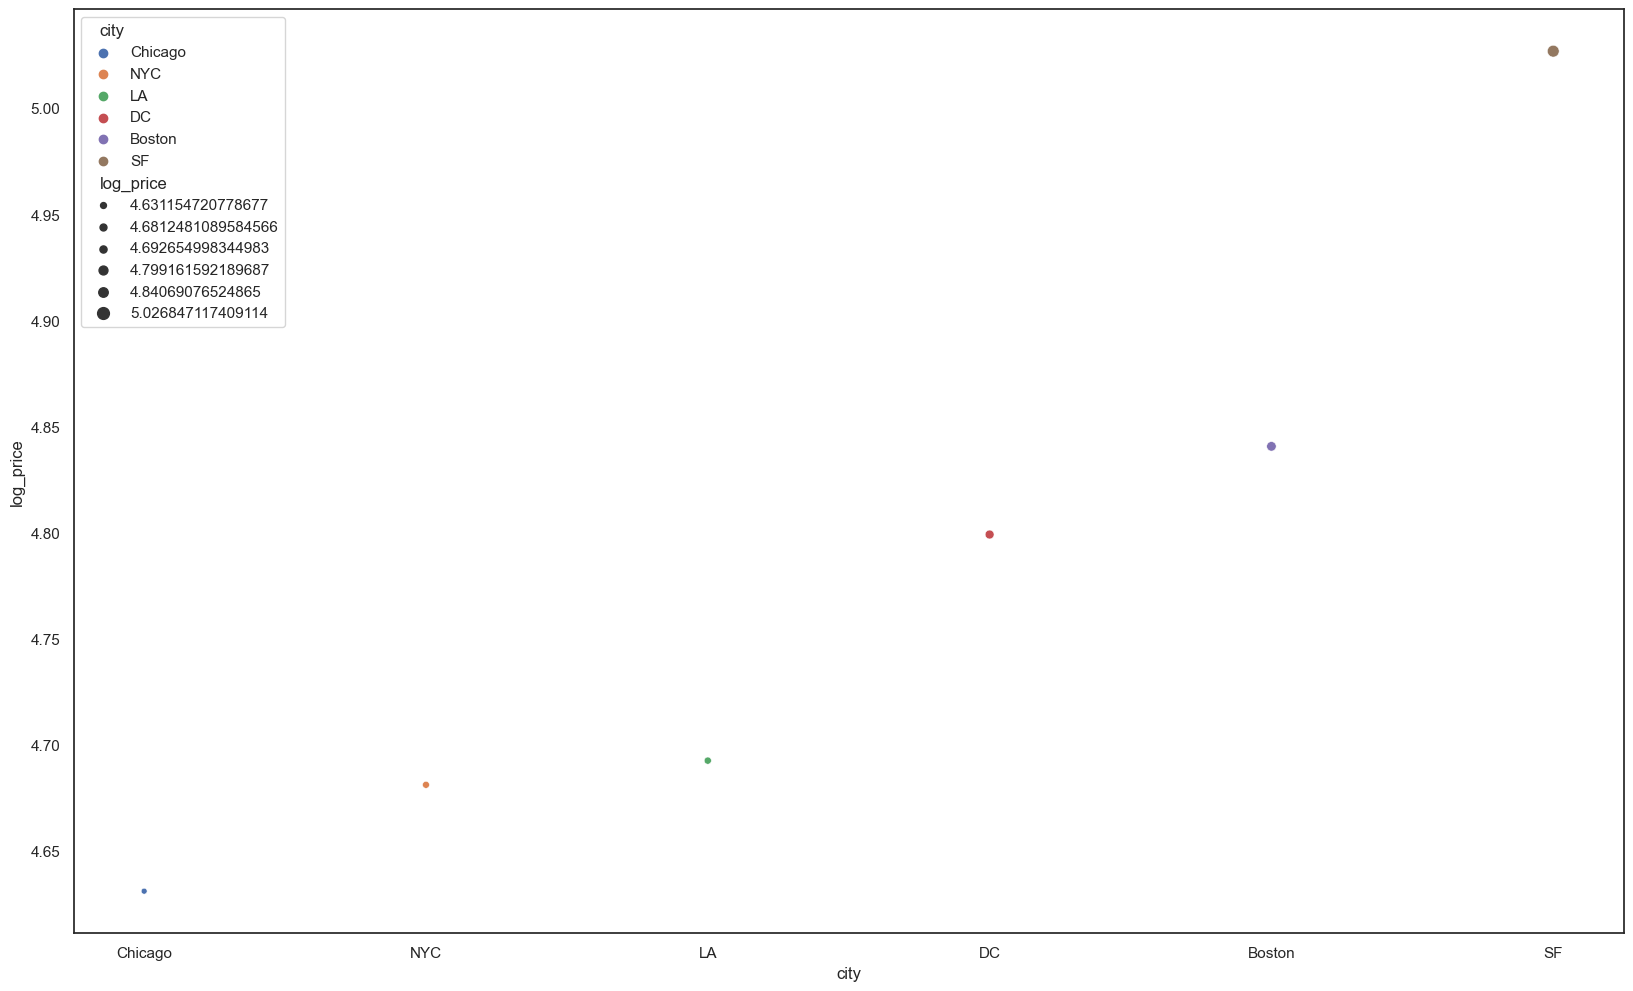

In [ ]:
plt.figure(figsize=(20,12))
sns.scatterplot(data= df_price_city, x = 'city', y = 'log_price', hue = 'city', size = 'log_price', legend = True)
plt.show()

Sorting further by neighbourhood and log_price it can be seen that the neighbourhood Wilmington has the highest accommodation-price, followed closely by Chevy Chase. It also can be seen that NYC has most districts in the top 10 for average log_price for AirBnb.

In [ ]:
df_price_neighbourhood = df.groupby(['city','neighbourhood'])['log_price'].mean().reset_index().sort_values(by='log_price')
df_price_neighbourhood.sort_values(by='log_price', ascending=False, inplace=True)
df_price_neighbourhood.head(20)

city          neighbourhood  log_price
589      SF              Daly City   5.831882
4    Boston              Cambridge   5.755211
190      DC      Mt. Vernon Square   5.733341
457     NYC           Graniteville   5.703782
408     NYC      Castleton Corners   5.594711
553     NYC              Todt Hill   5.521461
535     NYC              Rossville   5.501258
16   Boston         Harvard Square   5.480639
137      DC            Chillum, MD   5.480639
8    Boston        Coolidge Corner   5.416100
14   Boston     Financial District   5.361982
15   Boston      Government Center   5.357209
596      SF      Fisherman's Wharf   5.320987
514     NYC                   Noho   5.317238
606      SF                 Marina   5.315755
387     NYC      Battery Park City   5.314459
301      LA                 Malibu   5.310565
146      DC  Downtown/Penn Quarter   5.303456
484     NYC        Lighthouse HIll   5.298317
584      SF              Chinatown   5.296740

In [ ]:
df_price_city_roomtype = df.groupby(['city', 'room_type'])['log_price'].agg('mean').to_frame()
df_price_city_roomtype.sort_values(by='log_price', ascending=False, inplace=False)
df_price_city_roomtype

log_price
city    room_type                 
Boston  Entire home/apt   5.165106
        Private room      4.331248
        Shared room       4.231155
Chicago Entire home/apt   4.911697
        Private room      4.194779
        Shared room       4.106633
DC      Entire home/apt   4.992277
        Private room      4.427898
        Shared room       4.059993
LA      Entire home/apt   4.956248
        Private room      4.301718
        Shared room       4.030018
NYC     Entire home/apt   5.064512
        Private room      4.311663
        Shared room       4.154364
SF      Entire home/apt   5.302410
        Private room      4.694164
        Shared room       4.327080

In [ ]:
df_price_neighbourhood_roomtype = df.groupby(['neighbourhood', 'room_type'])['log_price'].agg('mean').to_frame()
df_price_neighbourhood_roomtype.sort_values(by='log_price', ascending=False, inplace=False)
df_price_neighbourhood_roomtype.head()



log_price
neighbourhood       room_type                 
16th Street Heights Entire home/apt   4.672185
                    Private room      4.303922
Adams Morgan        Entire home/apt   4.883322
                    Private room      4.499490
                    Shared room       3.735965

<h3> Evaluation Metrics </h3>
- MSE - Mean Squared Error
- RMSE - Sqrt Mean Square Error
- R Squared - Proportion of variance explained. That is: 100% means that the two variables are fully correlated.
- Adjusted R Squared - It takes into consideration the number of variables used to explain and penalizes complex models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score

train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})


<h3> Multiple Linear Regression </h3>

In [ ]:
#Dividir o dataframe em test e train
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)




#regressão linear multipla

#após varios testes com features diferentes, as variáveis em lista foram as que tiveram melhor  R^2
regr = linear_model.LinearRegression()
X_train = np.array(train_data[['room_type_Entire home/apt','room_type_Private room','room_type_Shared room','cleaning_fee','City_SF','beds','bedrooms', 'bathrooms', 'accommodates','TV','Family_kid_friendly','Dryer','Elevator','Washer','twentyfourhour_checkin']])
y_train = np.array(train_data['log_price'])
X_test = np.array(test_data[['room_type_Entire home/apt','room_type_Private room','room_type_Shared room','cleaning_fee','City_SF','beds','bedrooms', 'bathrooms', 'accommodates','TV','Family_kid_friendly','Dryer','Elevator','Washer','twentyfourhour_checkin']])
y_test = np.array(test_data['log_price'])
regr.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('Coefficients: ', regr.coef_)

Coefficients:  [-3.54963976e+11 -3.54963976e+11 -3.54963976e+11 -1.44292624e-02
  3.31161263e-01 -9.09717015e-03  1.11354299e-01  6.15324787e-02
  5.39275708e-02  1.12263279e-01  7.04976929e-03  4.49146361e-02
  1.32463525e-01 -2.64374471e-02 -2.04496854e-02]


The coefficient estimates for Ordinary Least Squares rely on the independence of the features

In [ ]:
train_pred = regr.predict(X_train)
mse_train = metrics.mean_squared_error(y_train, train_pred)
print(np.sqrt(mse_train))

0.39577777319754043


In [ ]:
test_pred = regr.predict(X_test)
mse_test = metrics.mean_squared_error(y_test, test_pred)
print(np.sqrt(mse_test))

0.3920618691895603


In [ ]:
print(regr.score(X_train, y_train))

0.5117088916032433


The higher the R² (result of the .score() function), the more explanatory the linear model is, that is, the better it fits the sample. For example, an R² = 0.5710 means that the linear model explains 57.10% of the variance of the dependent variable from the regressors (independent variables) included in that linear model.

In [ ]:
print(regr.score(X_test, y_test))

0.5226483678304077


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#após varios testes com features diferentes, estas são as que têm melhor  R^2
features=['room_type_Entire home/apt','room_type_Private room','room_type_Shared room','cleaning_fee','City_SF','beds','bedrooms', 'bathrooms', 'accommodates','TV','Family_kid_friendly','Dryer','Elevator','Washer','twentyfourhour_checkin']
polyfeat = PolynomialFeatures(degree=2)
#X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['log_price'])

In [ ]:
pred1 = poly.predict(X_testpoly)
mse_train = metrics.mean_squared_error(y_test, pred1)
print(np.sqrt(mse_train))

0.3872800647445199


In [ ]:
print(poly.score(X_testpoly, y_test))

0.5342214505125706


algoritmo ensemble.GradientBoostingRegressor

In [ ]:
X_train2 = np.array(train_data[['room_type_Entire home/apt','room_type_Private room','room_type_Shared room','cleaning_fee','City_SF','beds','bedrooms', 'bathrooms', 'accommodates','TV','Family_kid_friendly','Dryer','Elevator','Washer','twentyfourhour_checkin',]])
y_train2 = np.array(train_data['log_price'])
X_test2 = np.array(train_data[['room_type_Entire home/apt','room_type_Private room','room_type_Shared room','cleaning_fee','City_SF','beds','bedrooms', 'bathrooms', 'accommodates','TV','Family_kid_friendly','Dryer','Elevator','Washer','twentyfourhour_checkin']])
y_test2 = np.array(train_data['log_price'])

In [ ]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 75, max_depth = 11, min_samples_split = 4,
          learning_rate = 0.08,loss = 'squared_error')

In [ ]:
clf.fit(X_train2, y_train2)

GradientBoostingRegressor(learning_rate=0.08, max_depth=11, min_samples_split=4,
                          n_estimators=75)

In [ ]:
clf.score(X_test2,y_test2)

0.5912809558609595

In [ ]:
clf2 = ensemble.RandomForestRegressor(n_estimators=80, criterion='squared_error', max_depth=25,
                                     min_samples_split=5, min_samples_leaf=3, min_weight_fraction_leaf=0.0,
                                     max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0,
                                     bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0,
                                     warm_start=False, ccp_alpha=0.0, max_samples=None)

In [ ]:
clf2.fit(X_train2, y_train2)

RandomForestRegressor(max_depth=25, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=80)

In [ ]:
clf2.score(X_test2,y_test2)

0.5747272838666784

<h3> Conclusion </h3>

After exploring and cleaning the data and taking the features beds,bedrooms, bathrooms, accommodates, cleaning_fee into consideration and evaluating the results the MSE delivered the highest score of 59 % in using the linear regression algorithms to train the data.

It is assumed that this score can still be improved by balancing the data or by treating the null-values differently than replacing them with the mean.
Additionally the outliers could be differentiated by Neighborhoods and then be removed by neighbourhoods, rather than generally removing them.
Looking at the amenities, different amenities with higher correlations could have been selected to the price or better balancing.